## Objectives 
the objetives of this project is to create metrics that assign value to elements of tackling. The data includes information from Weeks 1-9 of the 2022 NFL season, covering player location, speed, acceleration and football location and buiuld a prediction model that predicts  win probability.

## Data dictionaries 

1-gameId: A unique identifier for each game in the dataset.

2-playId: A unique identifier for each play in the game.

3-ballCarrierId: The unique identifier for the player carrying the ball during a play.

4-ballCarrierDisplayName: The name of the player carrying the ball during a play.

5-playDescription: A description of the play, providing details about what happened during the play.

6-quarter: The quarter of the game in which the play occurred.

7-down: The down on which the play occurred (1st down, 2nd down, etc.).

8-yardsToGo: The number of yards needed to achieve a first down.

9-possessionTeam: The team that possesses the ball during the play.

10-defensiveTeam: The team playing defense during the play.

11-preSnapHomeTeamWinProbability: The win probability for the home team before the snap.

12-preSnapVisitorTeamWinProbability: The win probability for the visiting team before the snap.

13-homeTeamWinProbabilityAdded: The change in win probability for the home team on the given play.

14-visitorTeamWinProbilityAdded: The change in win probability for the visiting team on the given play.

15-expectedPoints: The expected points for the play, which represents the average number of points a team can expect to score based on the current game situation.

16-expectedPointsAdded: The change in expected points for the given play.

17-foulName1: The name of the first foul that occurred during the play.

18-foulName2: The name of the second foul that occurred during the play.

19-foulNFLId1: The NFL identifier for the player involved in the first foul.

20-foulNFLId2: The NFL identifier for the player involved in the second foul.

## Data exploration

In [1473]:
import pandas as pd

In [1402]:
plays = 'C:/Users/SAMSUNG/Documents/work space/plays.csv'

In [1403]:
plays_df = pd.read_csv(plays)

In [1404]:
# display fews row of plays data from plays csv file
plays_df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [1405]:
df = pd.DataFrame(plays_df)

In [1406]:
# display few rows of df
df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [1407]:
df.shape

(12486, 35)

In [1408]:
# checking the info of dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [1410]:
# Convert dtype of categorical columns
cat_cols = ['ballCarrierDisplayName' , 'playDescription' , 'possessionTeam' , 'defensiveTeam' ,
           'yardlineSide' , 'gameClock' , 'passResult' , 'playNullifiedByPenalty' , 'offenseFormation' ,
           'foulName1' , 'foulName2']

df[cat_cols] = df[cat_cols].astype('category')

## data cleaning

In [1411]:
# check for misng values
df.isnull().sum()

gameId                                  0
playId                                  0
ballCarrierId                           0
ballCarrierDisplayName                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          167
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
passResult                           6381
passLength                           6852
penaltyYards                        11871
prePenaltyPlayResult                    0
playResult                              0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
offenseFormation                        4
defendersInTheBox                 

In [1412]:
# Descriptive Statistics for 'playId' to see the structure of our colums

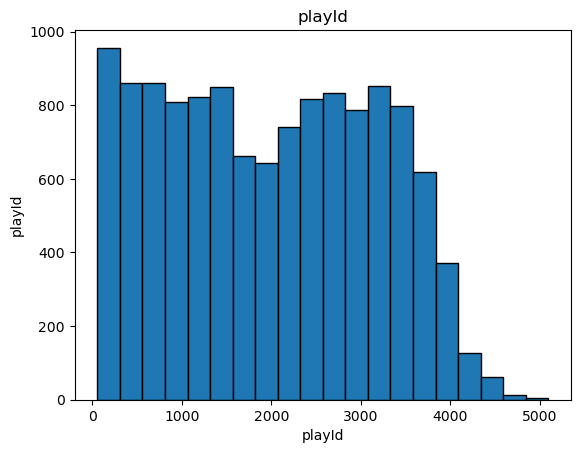

In [1413]:
import matplotlib.pyplot as plt

df['playId'].plot(kind='hist', bins=20, edgecolor='black')

plt.title('playId')
plt.xlabel('playId')
plt.ylabel('playId')

plt.show()

In [1416]:
# cleaning of dataset
import pandas as pd
df = df.dropna()

In [1417]:
# chech for misng values
df.isnull().sum()

gameId                              0
playId                              0
ballCarrierId                       0
ballCarrierDisplayName              0
playDescription                     0
quarter                             0
down                                0
yardsToGo                           0
possessionTeam                      0
defensiveTeam                       0
yardlineSide                        0
yardlineNumber                      0
gameClock                           0
preSnapHomeScore                    0
preSnapVisitorScore                 0
passResult                          0
passLength                          0
penaltyYards                        0
prePenaltyPlayResult                0
playResult                          0
playNullifiedByPenalty              0
absoluteYardlineNumber              0
offenseFormation                    0
defendersInTheBox                   0
passProbability                     0
preSnapHomeTeamWinProbability       0
preSnapVisit

In [1418]:
df.shape

(8, 35)

## Outlier Check

In [1419]:
#Check for outliers
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'df' is your DataFrame
num_cols = df.select_dtypes(include=['int', 'float']).columns
i = ['tr' + str(n) for n in range(1, 16)]

fig = make_subplots(rows=5, cols=3,
                    subplot_titles=[f'{col} Box Plot' for col in num_cols],
                    vertical_spacing=0.03)

for index, (col, trace) in enumerate(zip(num_cols, i)):
    box_trace = go.Box(y=df[col], boxmean=True, name=col)
    fig.add_trace(box_trace, row=(index // 3) + 1, col=(index % 3) + 1)

fig.update_layout(height=2000, width=1000,
                  title_text='Outlier Check in Numerical Columns',
                  showlegend=False)
fig.show()

In [1423]:
# handling outliers by fliiung the outliers with the mean of the df
df.fillna(df.mean(numeric_only=True), inplace=True)

In [1424]:
# Identify and remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Check the DataFrame after removing duplicates
df.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
2539,2022091900,463,54483,Treylon Burks,(7:59) (Shotgun) R.Tannehill pass short left t...,1,2,8,TEN,BUF,...,0.882784,0.117216,-0.019957,0.019957,1.524985,1.911744,Roughing the Passer,Illegal Use of Hands,53459.0,54650.0
2973,2022101607,3355,54673,Connor Heyward,"(10:58) (No Huddle, Shotgun) M.Trubisky pass s...",4,3,6,PIT,TB,...,0.517184,0.482816,0.209188,-0.209188,0.868154,3.926174,Defensive Offside,Defensive Too Many Men on Field,46081.0,46081.0
4270,2022102306,1924,46705,Allen Lazard,(1:55) (Shotgun) A.Rodgers pass short left to ...,2,1,10,GB,WAS,...,0.192431,0.807569,0.002678,-0.002678,2.039064,-0.837322,Illegal Shift,Offensive Holding,45635.0,45635.0
6351,2022110600,2928,44856,Gerald Everett,(12:12) J.Herbert pass short right to G.Everet...,4,1,10,LAC,ATL,...,0.547380,0.452620,0.047967,-0.047967,2.083483,-1.037525,Ineligible Downfield Pass,Offensive Holding,41390.0,47874.0
7269,2022101607,3596,44816,Leonard Fournette,"(7:52) (No Huddle, Shotgun) T.Brady pass short...",4,1,10,TB,PIT,...,0.739908,0.260092,-0.038232,0.038232,3.722697,0.730398,Defensive Offside,Defensive Too Many Men on Field,48089.0,48089.0


## data processing and handling category variables

In [1425]:
# 'ballCarrierDisplayName': I'm converting it to int
ballCarrierDisplayName_mapping = {name: index for index, name in enumerate(df['ballCarrierDisplayName'].unique())}
# Map the values in the 'ballCarrierDisplayName' column to integers
df['ballCarrierDisplayName'] = df['ballCarrierDisplayName'].map(ballCarrierDisplayName_mapping)
df['ballCarrierDisplayName'].astype(int)


2539     0
2973     1
4270     2
6351     3
7269     4
10271    5
11275    6
12197    7
Name: ballCarrierDisplayName, dtype: int32

In [1426]:
df.ballCarrierDisplayName.nunique()

8

In [1427]:
# 'defensiveTeam': I'm converting it to int
defensiveTeam_mapping = {name: index for index, name in enumerate(df['defensiveTeam'].unique())}
# Map the values in the column to integers
df['defensiveTeam'] = df['defensiveTeam'].map(defensiveTeam_mapping)
df['defensiveTeam'].astype(int)


2539     0
2973     1
4270     2
6351     3
7269     4
10271    5
11275    2
12197    6
Name: defensiveTeam, dtype: int32

In [1428]:
df.defensiveTeam.nunique()

7

In [1429]:
# 'foulName1': I'm converting it to int
foulName1_mapping = {name: index for index, name in enumerate(df['foulName1'].unique())}
# Map the values in the  column to integers
df['foulName1'] = df['foulName1'].map(foulName1_mapping)
df['foulName1'].astype(int)

2539     0
2973     1
4270     2
6351     3
7269     1
10271    4
11275    0
12197    0
Name: foulName1, dtype: int32

In [1430]:
df.foulName1.nunique()

5

In [1431]:
# 'foulName2': I'm converting it to int
foulName2_mapping = {name: index for index, name in enumerate(df['foulName2'].unique())}
# Map the values in the column to integers
df['foulName2'] = df['foulName2'].map(foulName2_mapping)
df['foulName2'].astype(int)

2539     0
2973     1
4270     2
6351     2
7269     1
10271    3
11275    4
12197    5
Name: foulName2, dtype: int32

In [1432]:
df.foulName2.nunique()

6

In [1433]:
# 'possessionTeam': I'm converting it to int
possessionTeam_mapping = {name: index for index, name in enumerate(df['possessionTeam'].unique())}
# Map the values in the  column to integers
df['possessionTeam'] = df['possessionTeam'].map(possessionTeam_mapping)
df['possessionTeam'].astype(int)

2539     0
2973     1
4270     2
6351     3
7269     4
10271    3
11275    0
12197    5
Name: possessionTeam, dtype: int32

In [1434]:
df.possessionTeam.nunique()

6

In [1435]:
# 'playDescription': I'm converting it to int
playDescription_mapping = {name: index for index, name in enumerate(df['playDescription'].unique())}
# Map the values in the column to integers
df['playDescription'] = df['playDescription'].map(playDescription_mapping)
df['playDescription'].astype(int)

2539     0
2973     1
4270     2
6351     3
7269     4
10271    5
11275    6
12197    7
Name: playDescription, dtype: int32

In [1436]:
df.playDescription.nunique()

8

In [1437]:
# 'gameClock': I'm converting it to int
gameClock_mapping = {name: index for index, name in enumerate(df['gameClock'].unique())}
# Map the values in the column to integers
df['gameClock'] = df['gameClock'].map(gameClock_mapping)
df['gameClock'].astype(int)

2539     0
2973     1
4270     2
6351     3
7269     4
10271    5
11275    6
12197    7
Name: gameClock, dtype: int32

In [1438]:
df.gameClock.nunique()

8

In [1439]:
# 'yardlineSide': I'm converting it to int
yardlineSide_mapping = {name: index for index, name in enumerate(df['yardlineSide'].unique())}
# Map the values in the 'yardlineSide' column to integers
df['yardlineSide'] = df['yardlineSide'].map(yardlineSide_mapping)
df['yardlineSide'].astype(int)

2539     0
2973     1
4270     2
6351     3
7269     1
10271    4
11275    5
12197    6
Name: yardlineSide, dtype: int32

In [1440]:
df

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
2539,2022091900,463,54483,0.0,0.0,1,2,8,0.0,0.0,...,0.882784,0.117216,-0.019957,0.019957,1.524985,1.911744,0.0,0.0,53459.0,54650.0
2973,2022101607,3355,54673,1.0,1.0,4,3,6,1.0,1.0,...,0.517184,0.482816,0.209188,-0.209188,0.868154,3.926174,1.0,1.0,46081.0,46081.0
4270,2022102306,1924,46705,2.0,2.0,2,1,10,2.0,2.0,...,0.192431,0.807569,0.002678,-0.002678,2.039064,-0.837322,2.0,2.0,45635.0,45635.0
6351,2022110600,2928,44856,3.0,3.0,4,1,10,3.0,3.0,...,0.547380,0.452620,0.047967,-0.047967,2.083483,-1.037525,3.0,2.0,41390.0,47874.0
7269,2022101607,3596,44816,4.0,4.0,4,1,10,4.0,4.0,...,0.739908,0.260092,-0.038232,0.038232,3.722697,0.730398,1.0,1.0,48089.0,48089.0
10271,2022091500,741,44819,5.0,5.0,1,2,3,3.0,5.0,...,0.504757,0.495243,-0.060833,0.060833,3.370081,3.123174,4.0,3.0,47984.0,47984.0
11275,2022100909,1696,46506,6.0,6.0,2,3,8,0.0,2.0,...,0.491072,0.508928,-0.080686,0.080686,2.286048,2.252818,0.0,4.0,42331.0,47809.0
12197,2022102304,2327,38696,7.0,7.0,3,2,10,5.0,6.0,...,0.630265,0.369735,0.028744,-0.028744,4.220595,0.958267,0.0,5.0,47800.0,52518.0


In [1441]:
len(df.columns)

35

In [1442]:
# task summed up common  variable for future engeering
df['game_Id'] = df['gameId'] + df['playId'] + df['ballCarrierId']
df.drop(['gameId', 'playId' , 'ballCarrierId'], axis='columns', inplace=True)

In [1443]:
df['homeTeamWinProbability_Added'] = df['homeTeamWinProbabilityAdded'] + df['visitorTeamWinProbilityAdded'] + df['preSnapVisitorTeamWinProbability']
df.drop(['homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded' , 'preSnapVisitorTeamWinProbability'], axis='columns', inplace=True)


## Descriptive Statistics

In [1444]:
# Display summary statistics
df.describe().head()

,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,...,passProbability,preSnapHomeTeamWinProbability,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_Id,homeTeamWinProbability_Added
count,8.00000,8.00000,8.00000,8.000000,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000
mean,3.50000,3.50000,2.62500,1.875000,8.125000,2.250000,2.87500,2.75000,38.500000,3.50000,...,0.719817,0.563223,2.514388,1.378466,1.375000,2.250000,46596.125000,48830.000000,2.022149e+09,0.436777
std,2.44949,2.44949,1.30247,0.834523,2.531939,1.832251,2.03101,2.12132,6.094494,2.44949,...,0.206810,0.202242,1.149914,1.769866,1.505941,1.669046,3764.256422,3127.297875,7.406257e+03,0.202242
min,0.00000,0.00000,1.00000,1.000000,3.000000,0.000000,0.00000,0.00000,24.000000,0.00000,...,0.364656,0.192431,0.868154,-1.037525,0.000000,0.000000,41390.000000,45635.000000,2.022137e+09,0.117216
25%,1.75000,1.75000,1.75000,1.000000,7.500000,0.750000,1.75000,1.00000,39.500000,1.75000,...,0.593122,0.501335,1.910544,0.338468,0.000000,1.000000,44809.000000,47377.000000,2.022146e+09,0.342324


In [1445]:
df.describe(include='all')

,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,...,passProbability,preSnapHomeTeamWinProbability,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_Id,homeTeamWinProbability_Added
count,8.00000,8.00000,8.00000,8.000000,8.000000,8.000000,8.00000,8.00000,8.000000,8.00000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.50000,3.50000,2.62500,1.875000,8.125000,2.250000,2.87500,2.75000,38.500000,3.50000,...,0.719817,0.563223,2.514388,1.378466,1.375000,2.250000,46596.125000,48830.000000,2.022149e+09,0.436777
std,2.44949,2.44949,1.30247,0.834523,2.531939,1.832251,2.03101,2.12132,6.094494,2.44949,...,0.206810,0.202242,1.149914,1.769866,1.505941,1.669046,3764.256422,3127.297875,7.406257e+03,0.202242
min,0.00000,0.00000,1.00000,1.000000,3.000000,0.000000,0.00000,0.00000,24.000000,0.00000,...,0.364656,0.192431,0.868154,-1.037525,0.000000,0.000000,41390.000000,45635.000000,2.022137e+09,0.117216
25%,1.75000,1.75000,1.75000,1.000000,7.500000,0.750000,1.75000,1.00000,39.500000,1.75000,...,0.593122,0.501335,1.910544,0.338468,0.000000,1.000000,44809.000000,47377.000000,2.022146e+09,0.342324
50%,3.50000,3.50000,2.50000,2.000000,9.000000,2.500000,2.50000,2.50000,40.000000,3.50000,...,0.731232,0.532282,2.184766,1.435005,1.000000,2.000000,46940.500000,47929.000000,2.022150e+09,0.467718
75%,5.25000,5.25000,4.00000,2.250000,10.000000,3.250000,4.25000,4.25000,41.000000,5.25000,...,0.859898,0.657676,3.458235,2.470407,2.250000,3.250000,48010.250000,49196.250000,2.022153e+09,0.498665


In [1446]:
df.shape

(8, 31)

<Axes: >

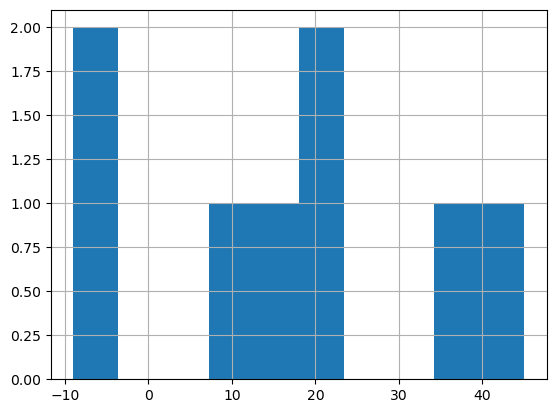

In [1447]:
# use histogram to check the nature of strucure fo playresult
df.playResult.hist()

# split dataset to train and test csv to prepare our data for modeling

In [1448]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the split DataFrames to separate CSV files
train_df.to_csv('churn_train.csv', index=False)
test_df.to_csv('churn_test.csv', index=False)

## Exploratory Data Analysis

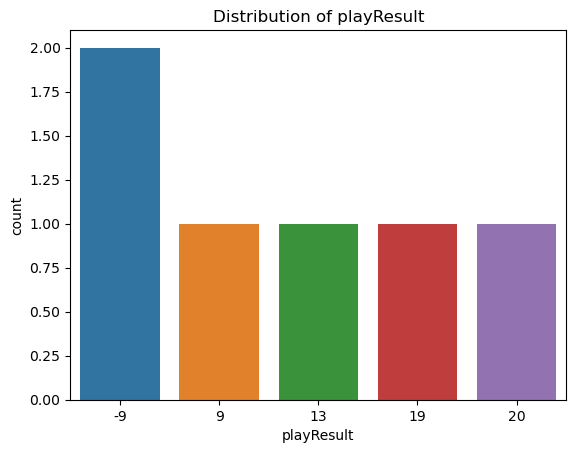

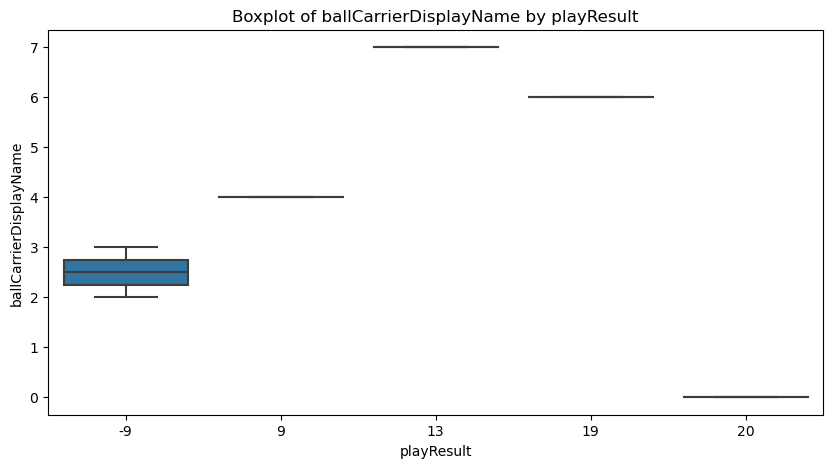

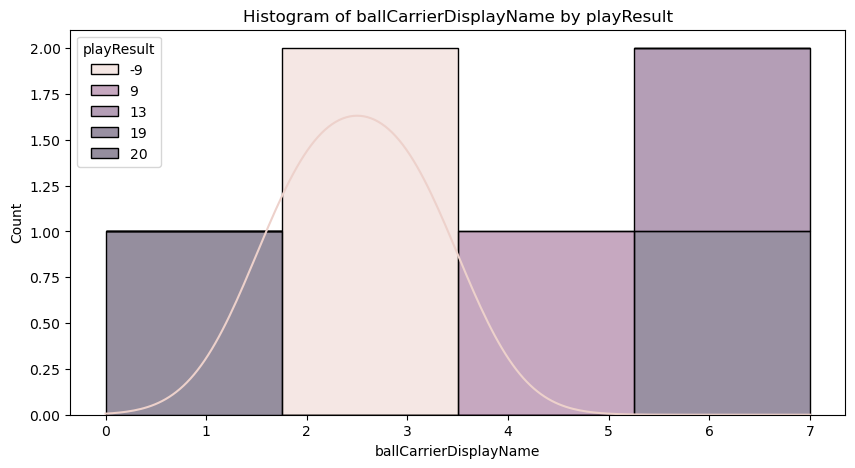

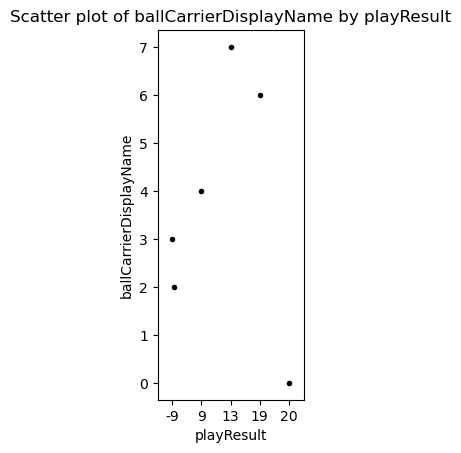

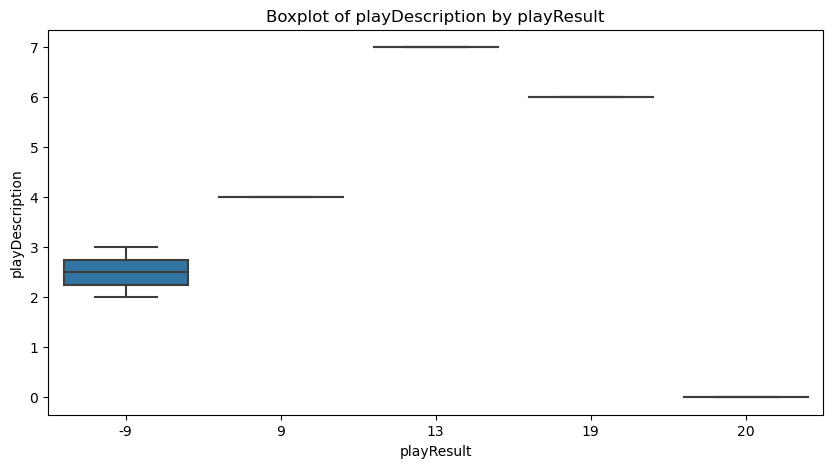

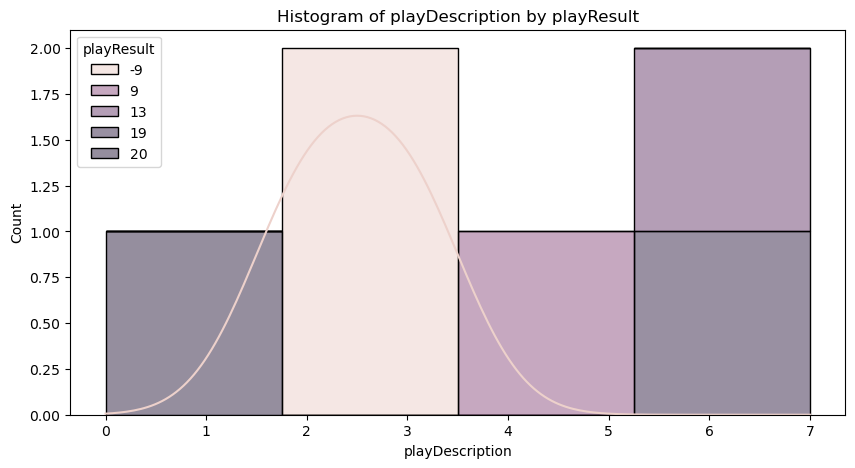

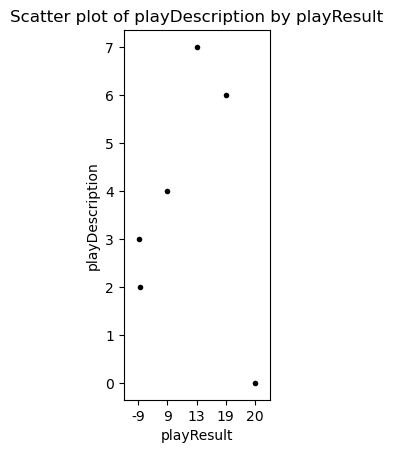

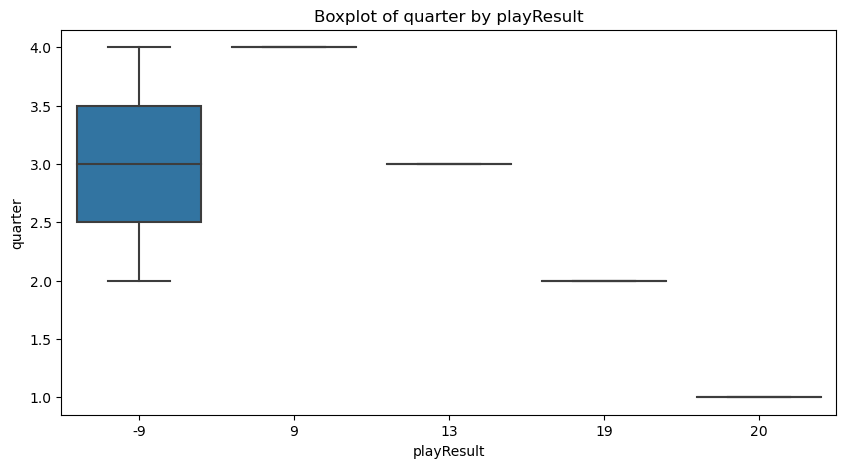

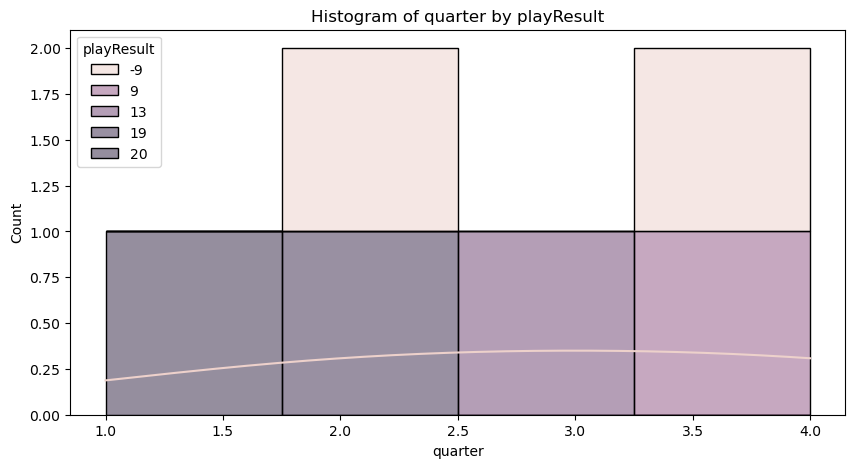

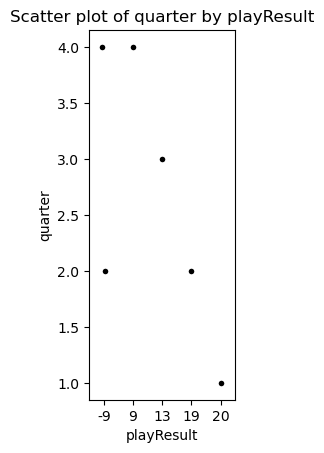

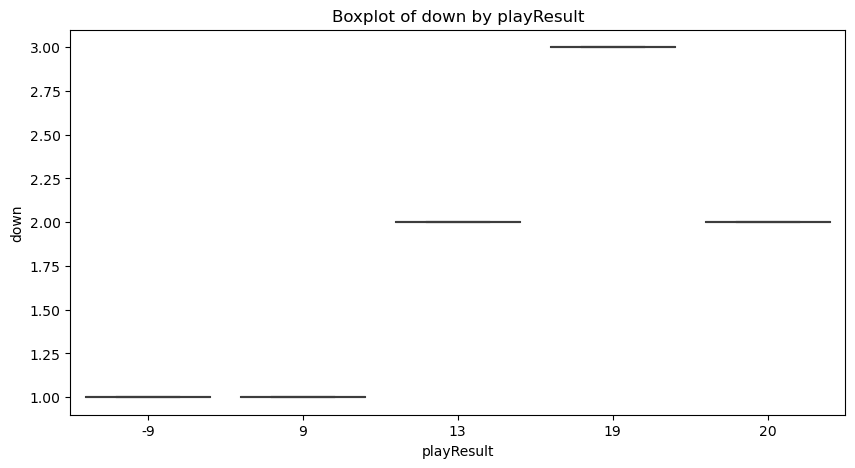

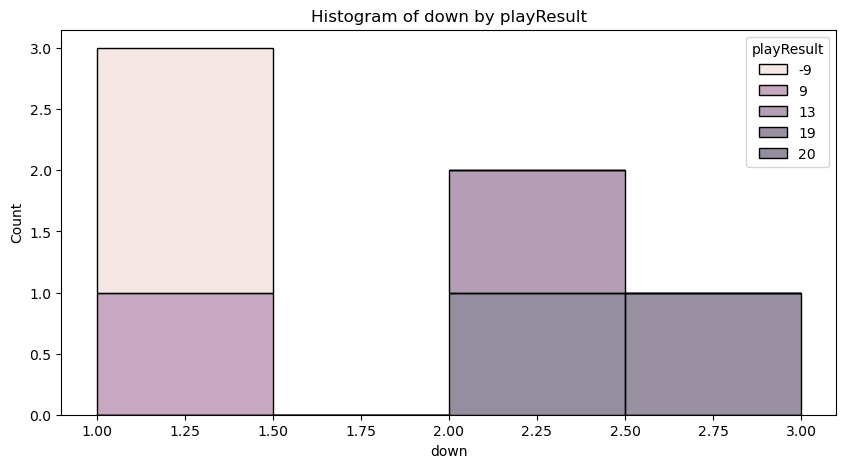

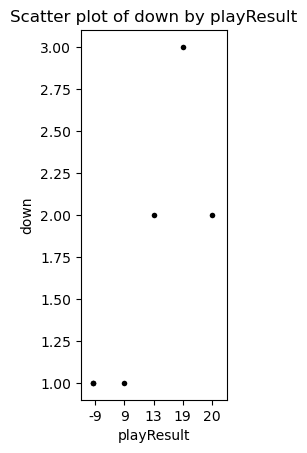

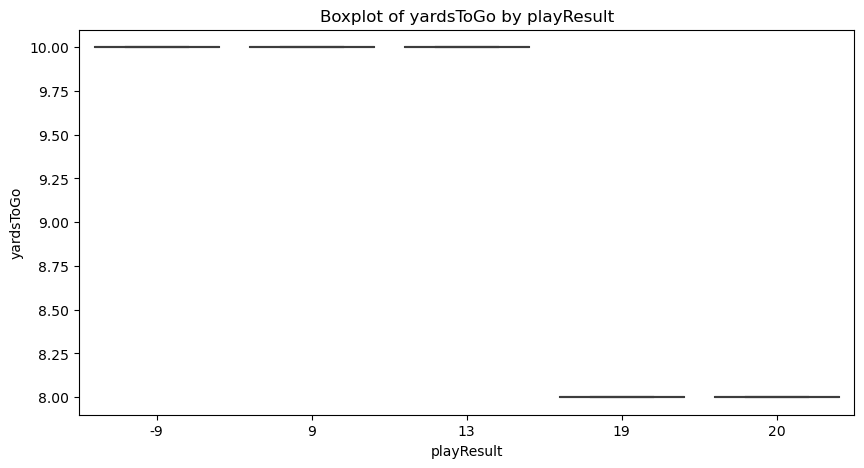

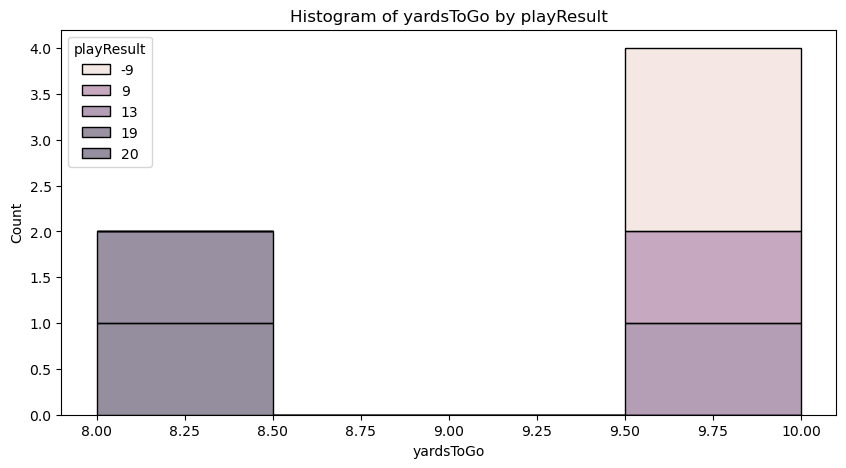

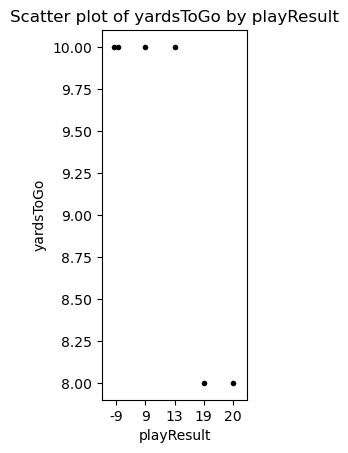

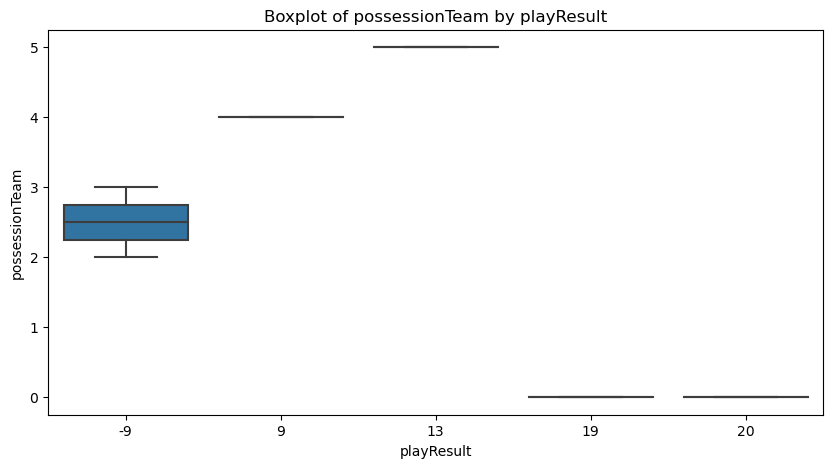

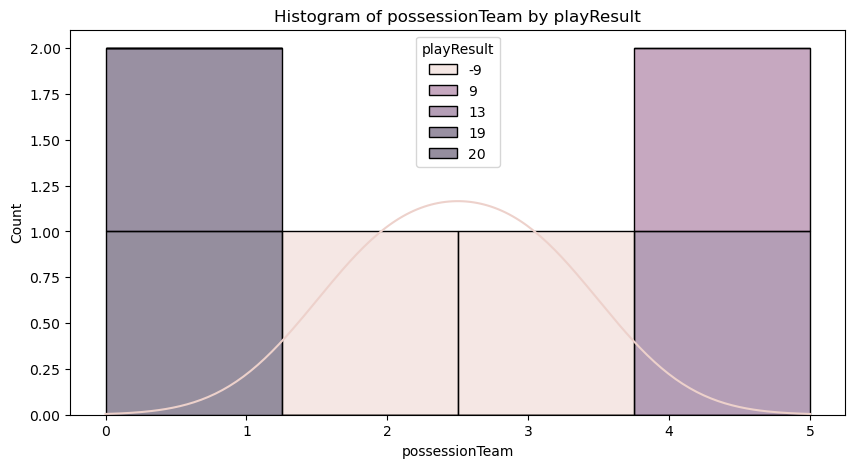

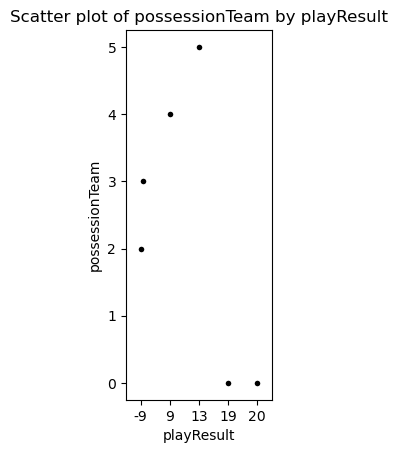

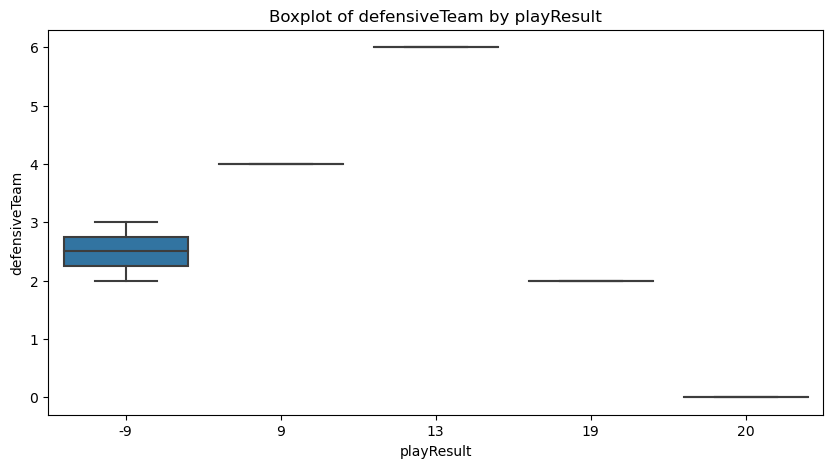

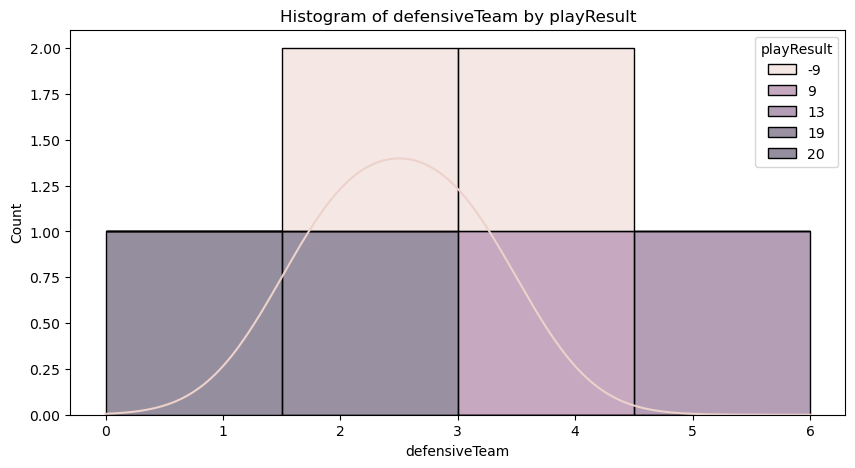

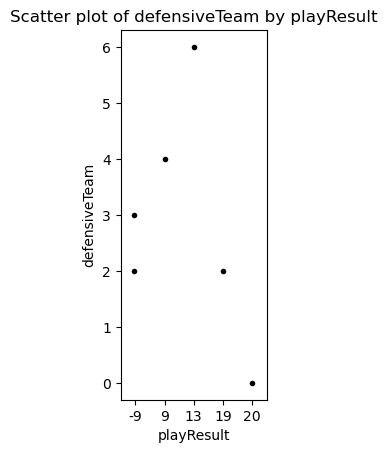

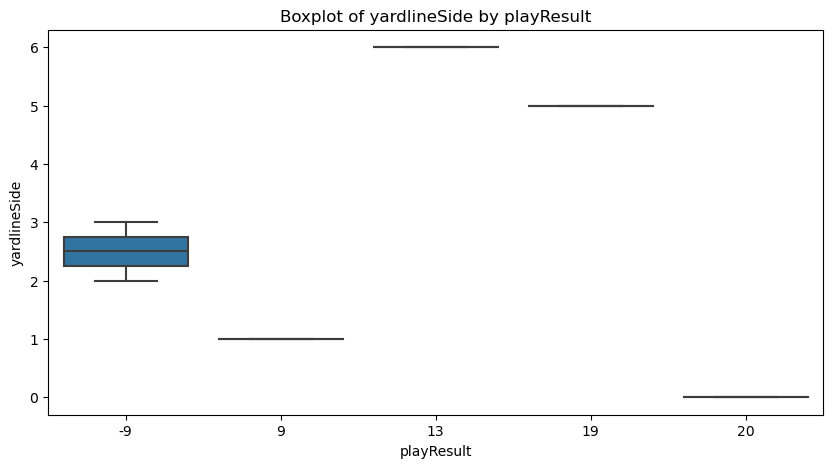

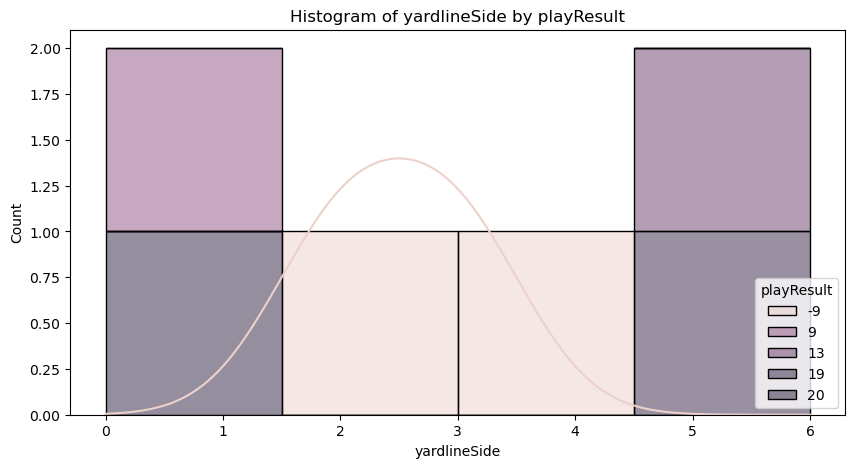

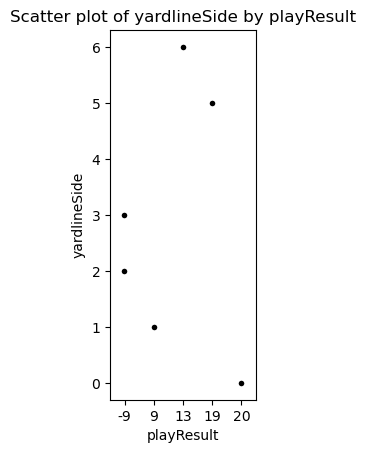

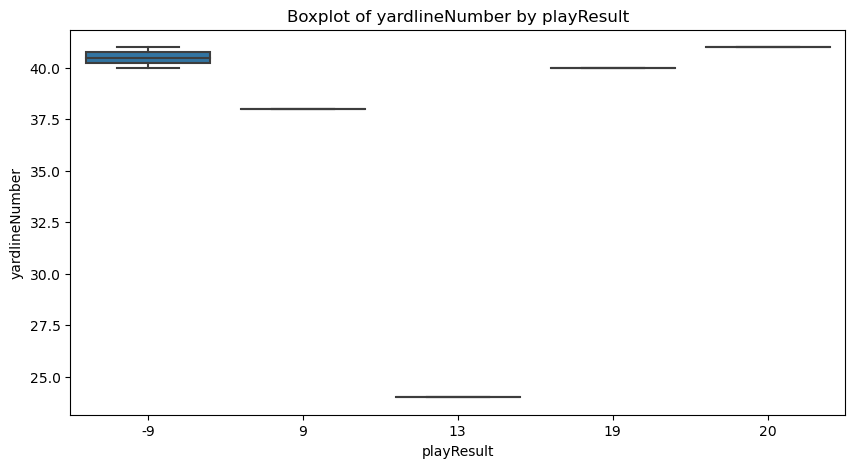

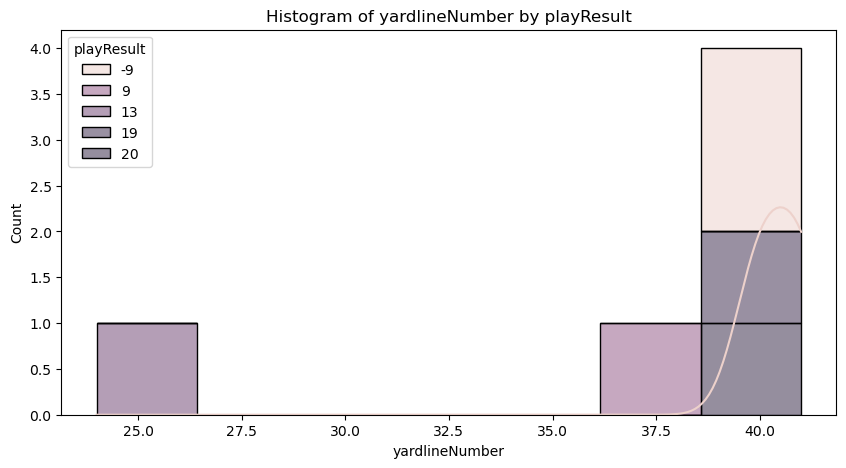

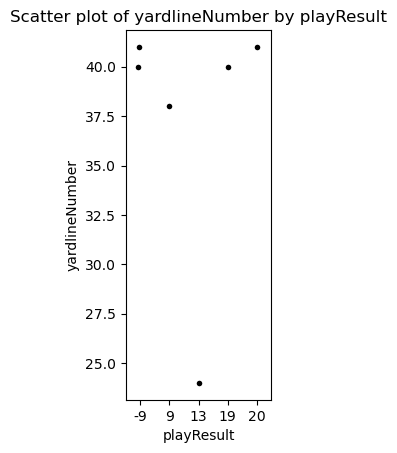

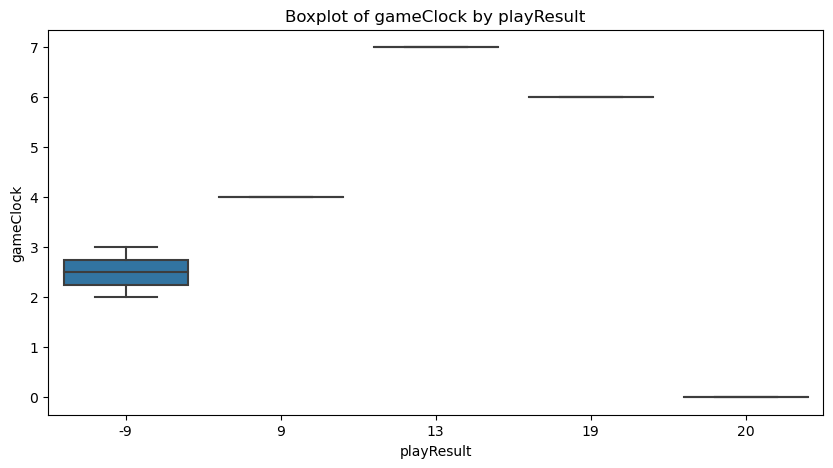

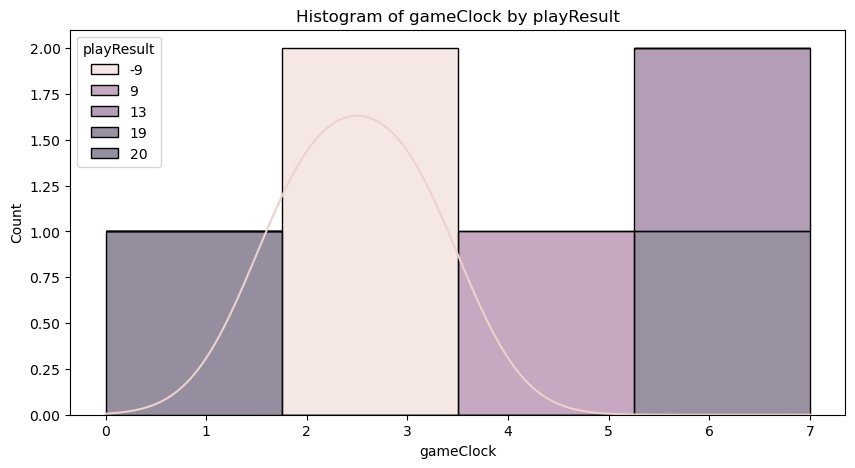

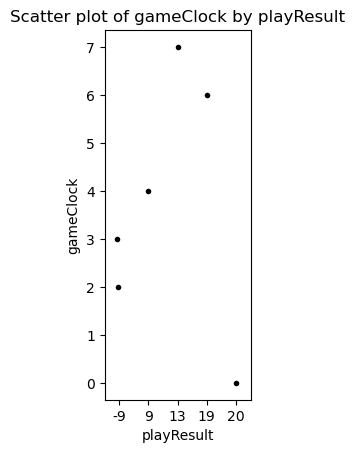

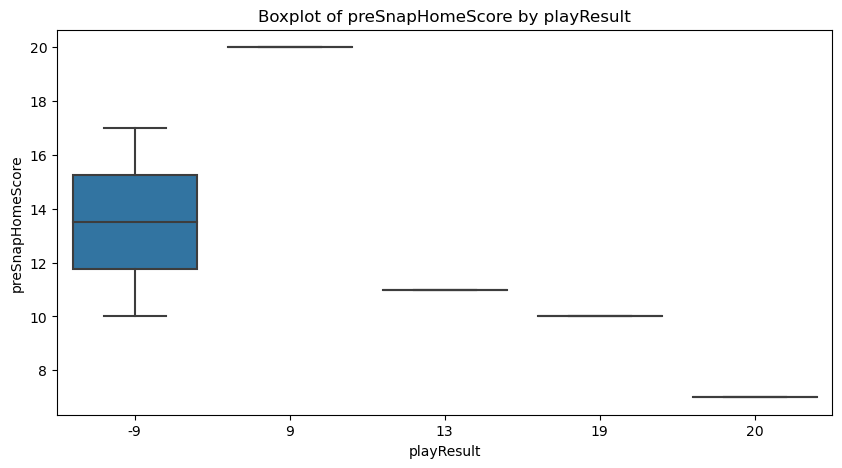

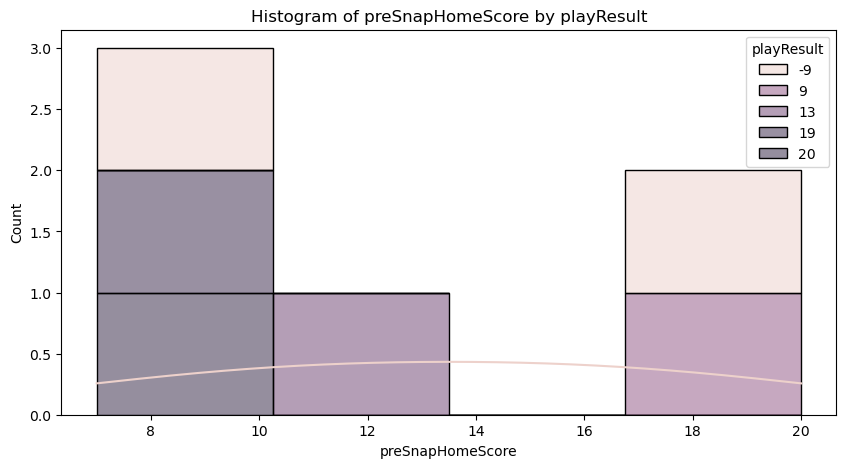

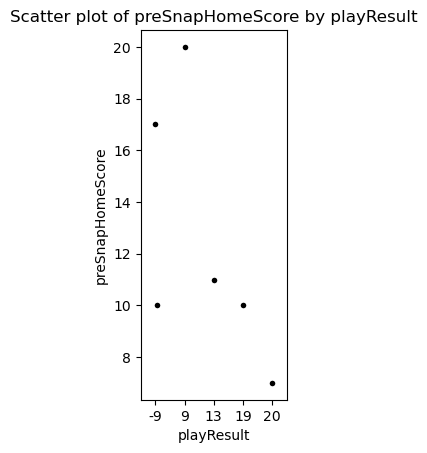

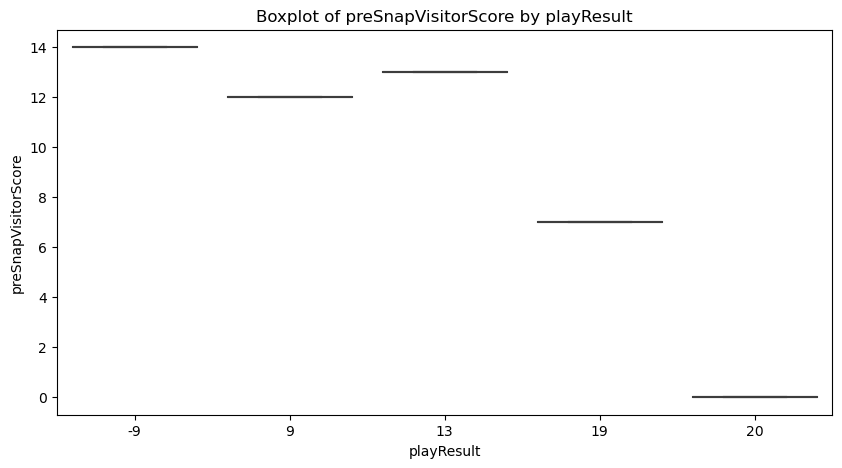

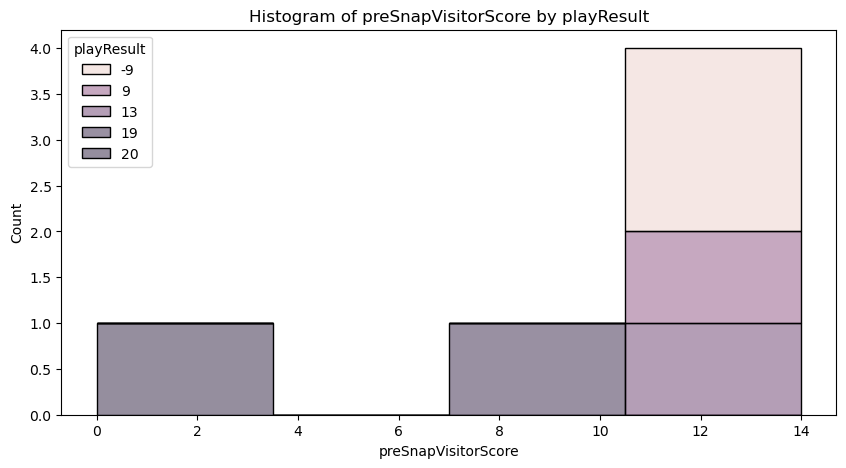

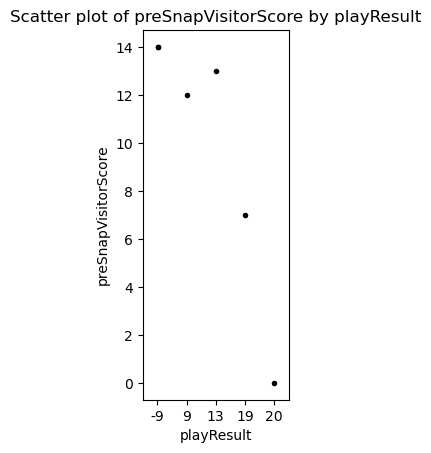

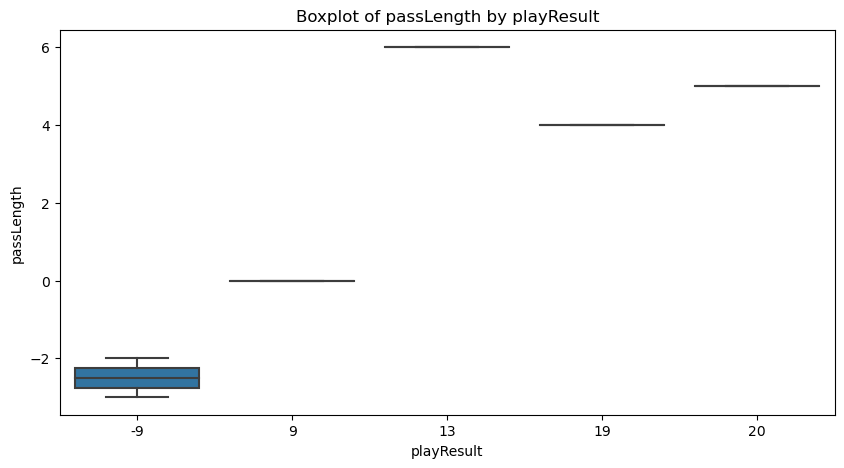

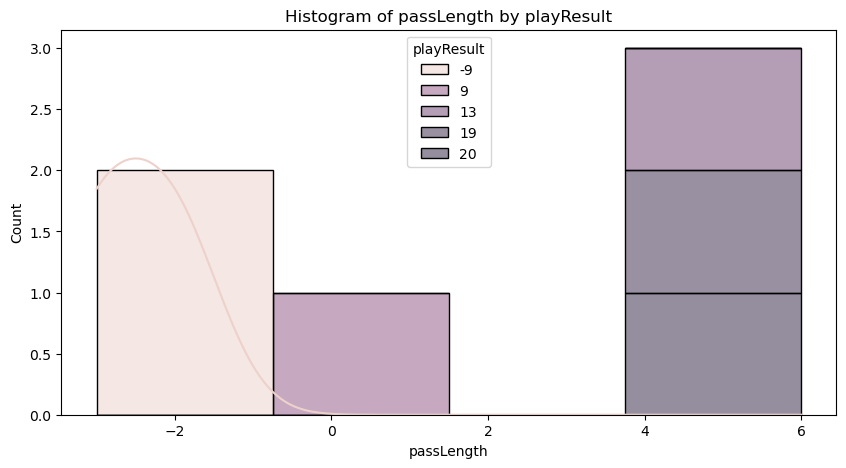

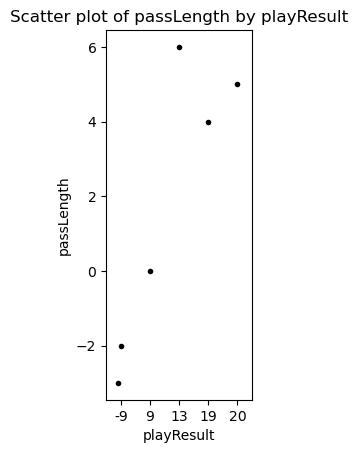

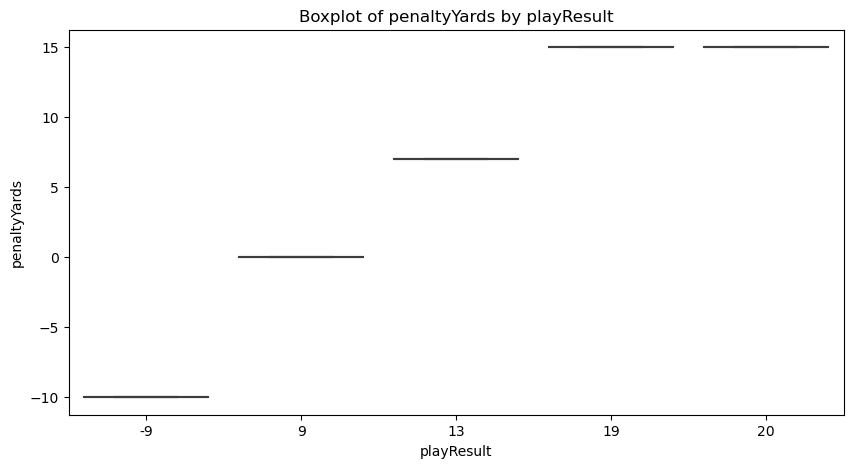

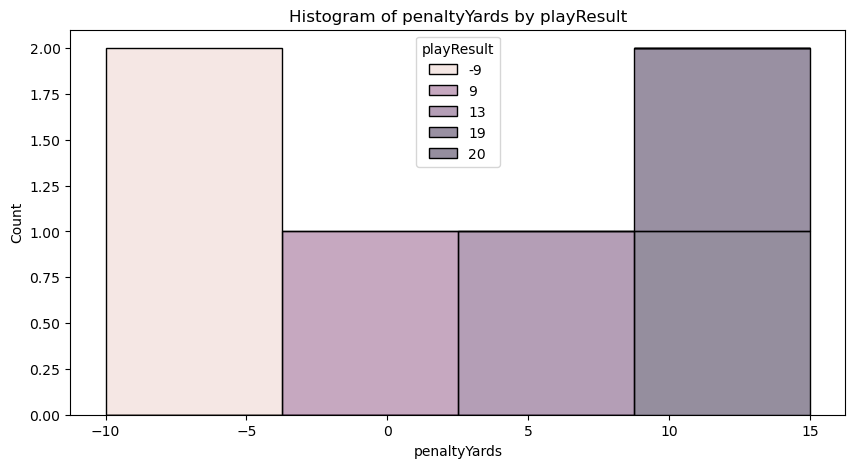

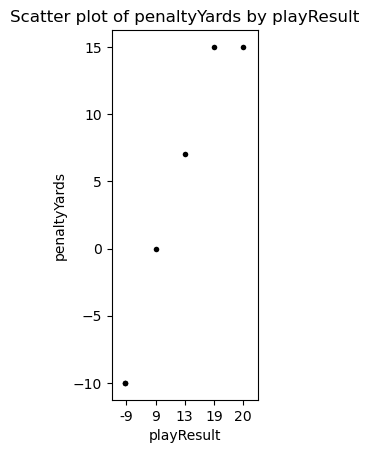

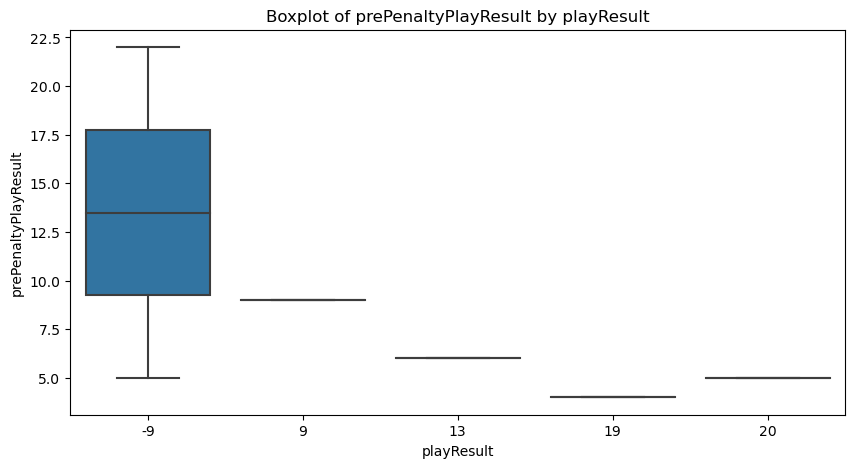

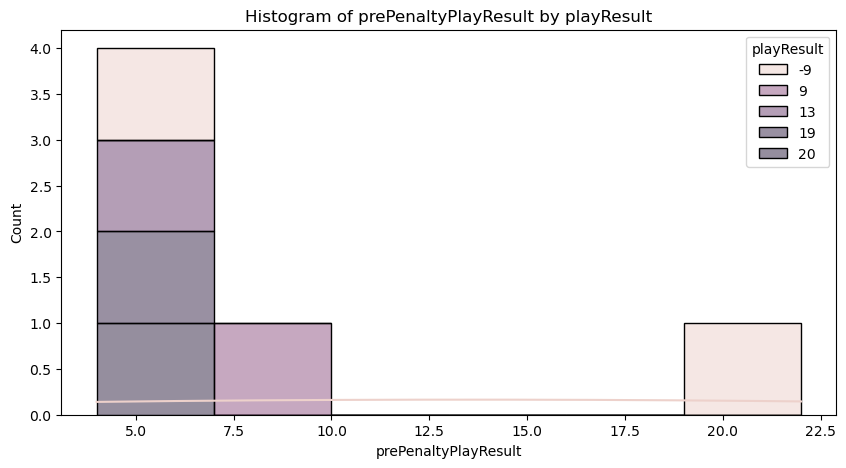

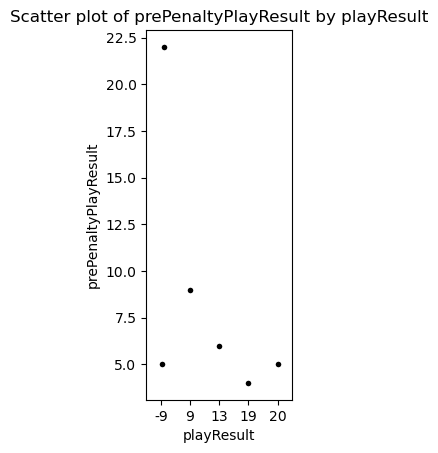

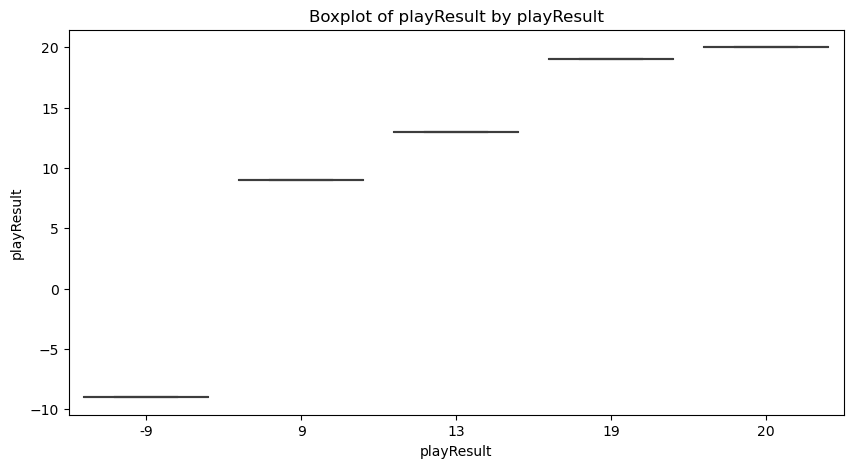

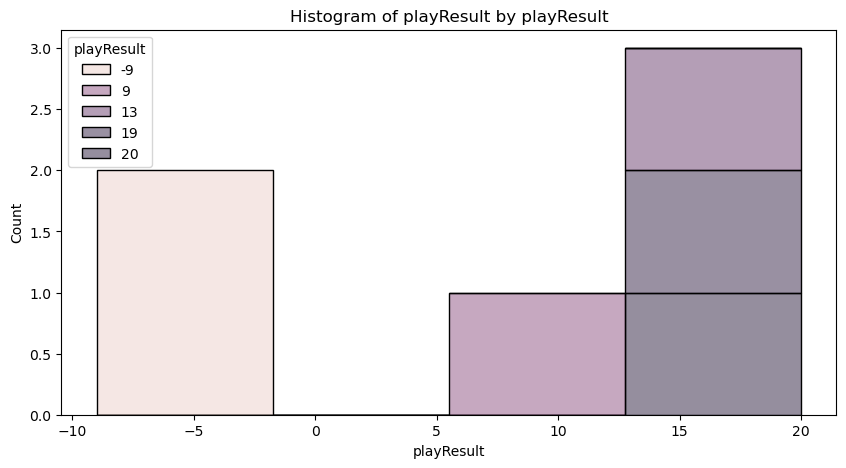

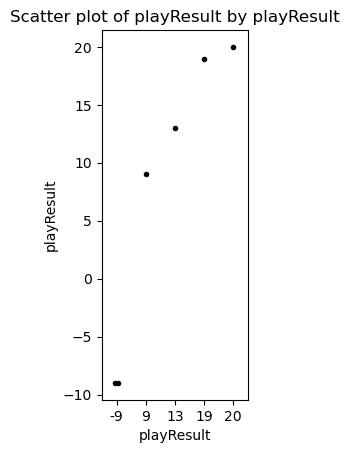

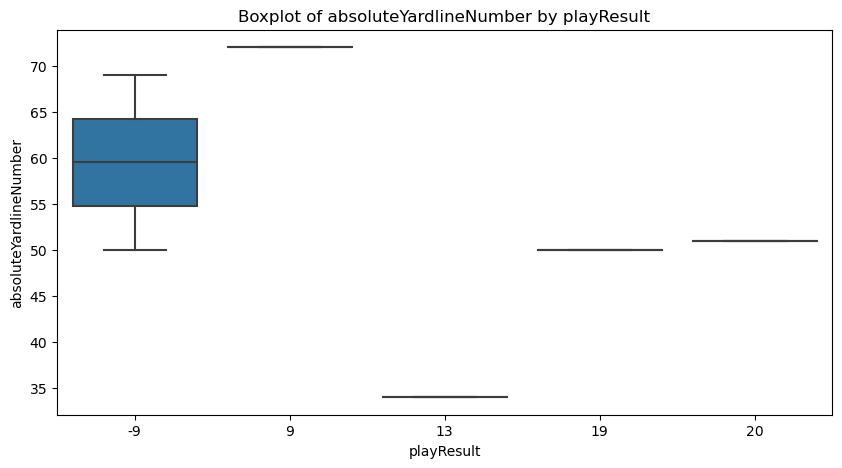

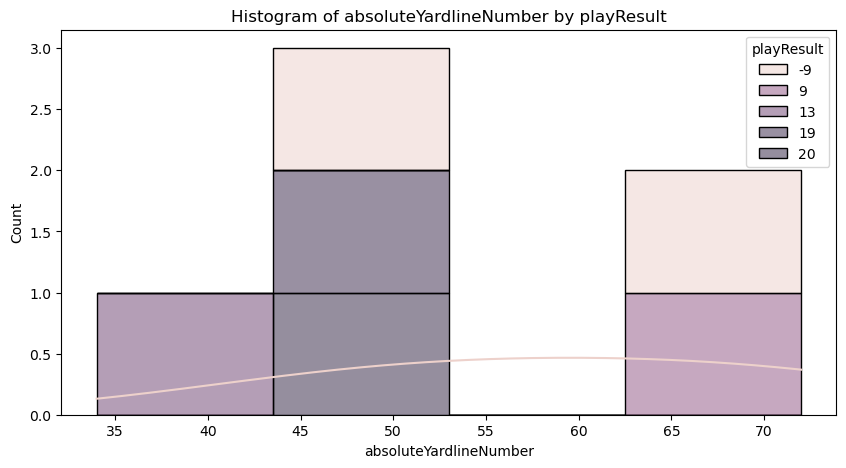

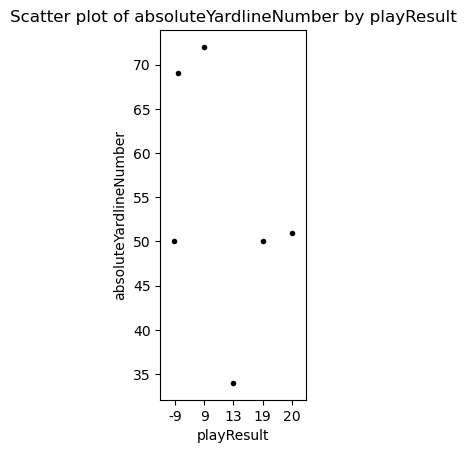

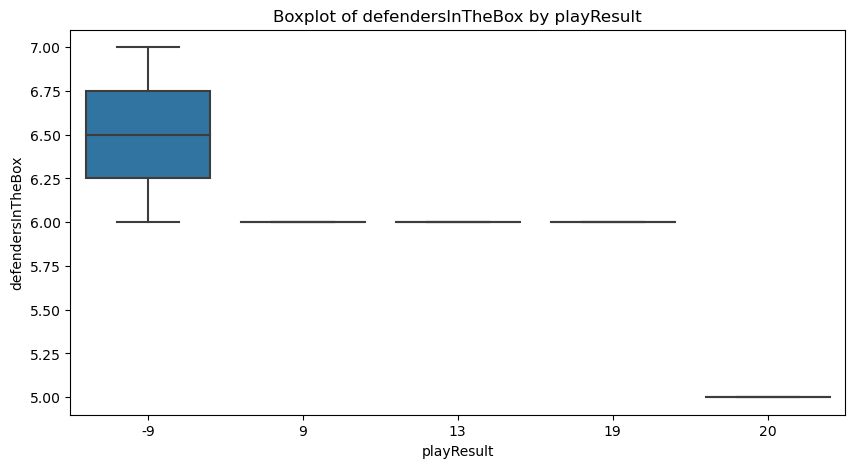

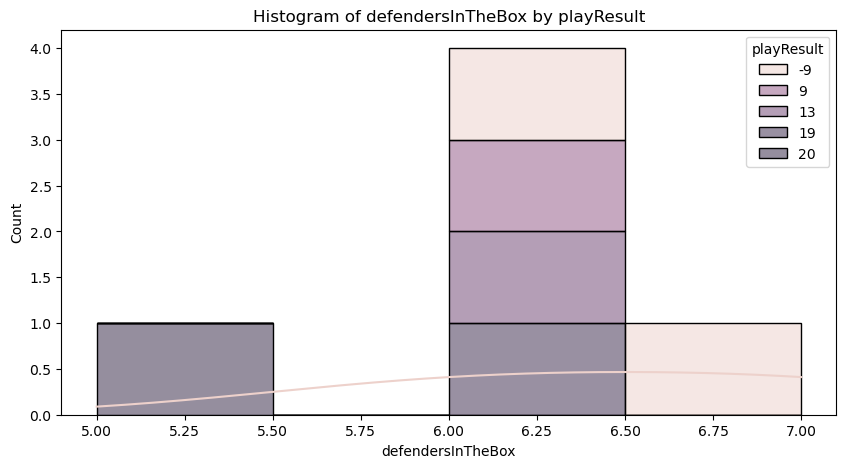

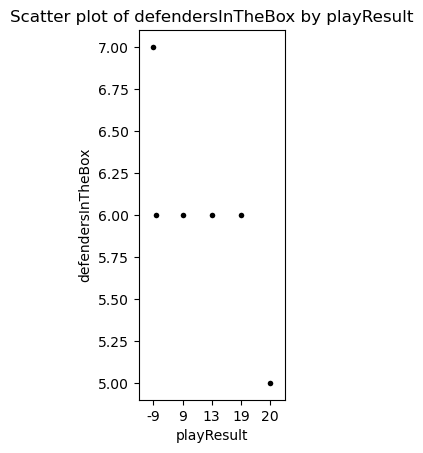

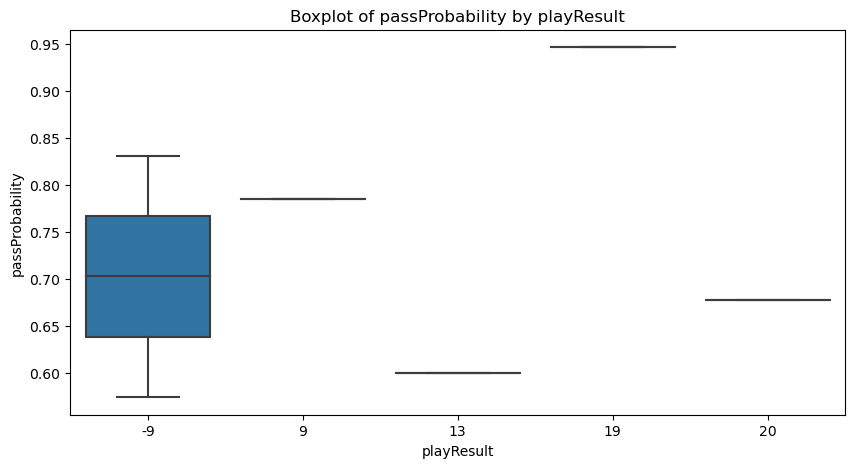

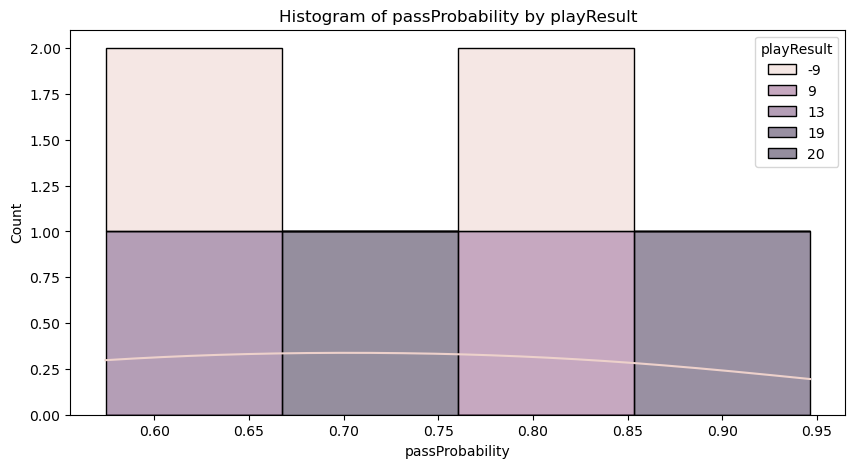

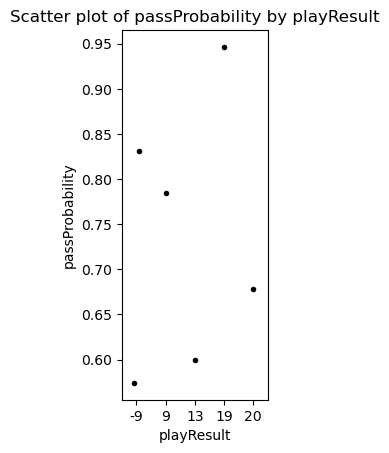

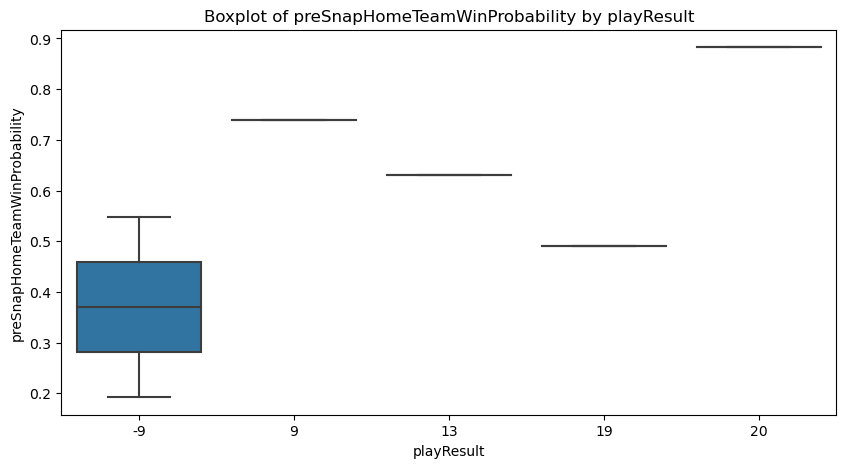

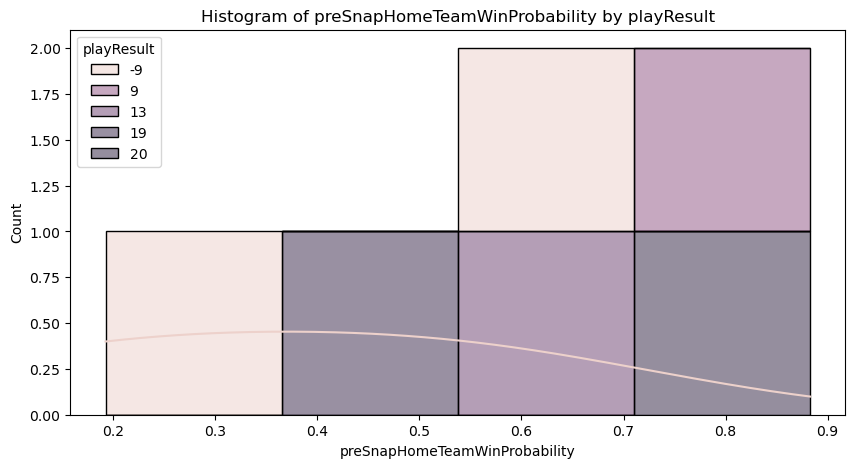

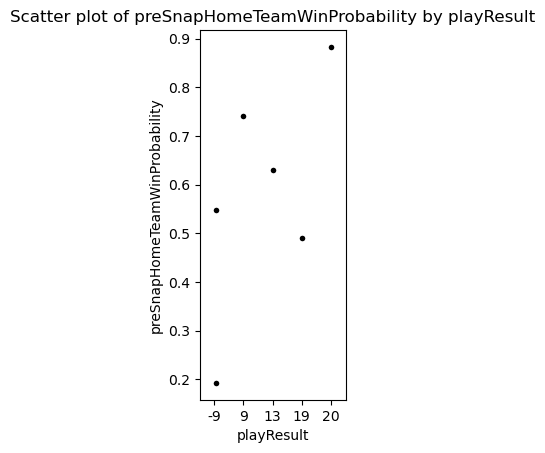

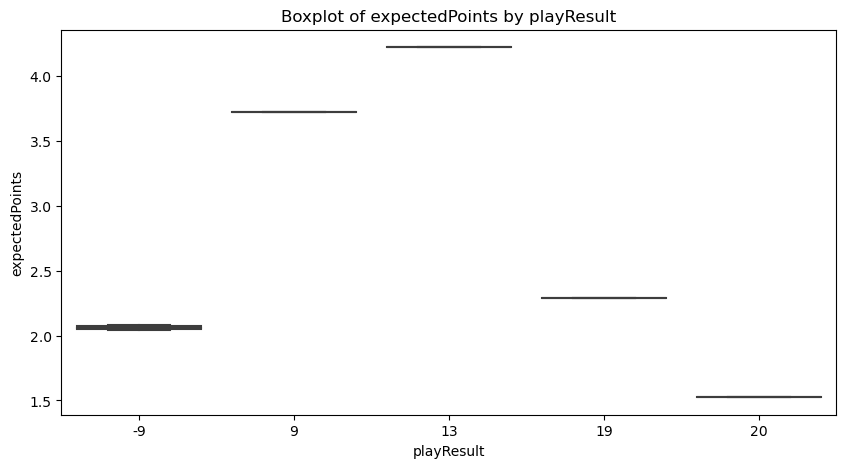

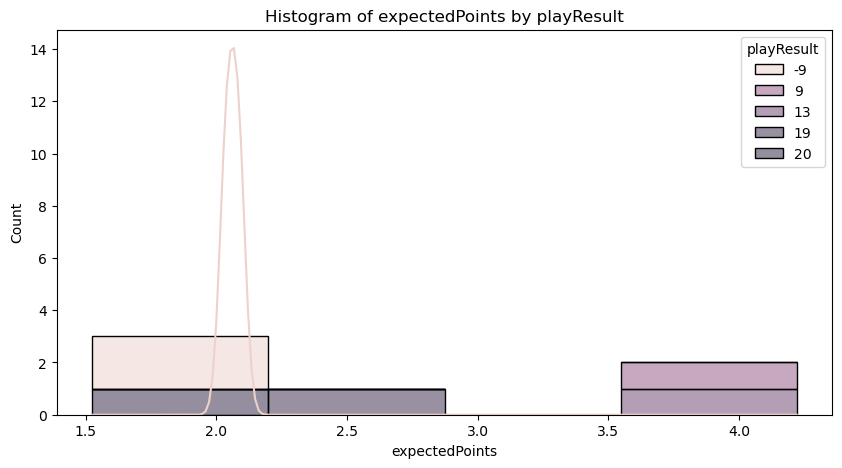

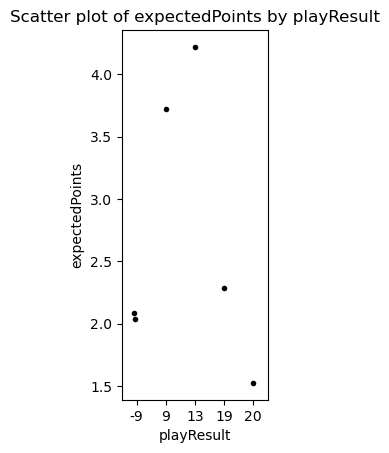

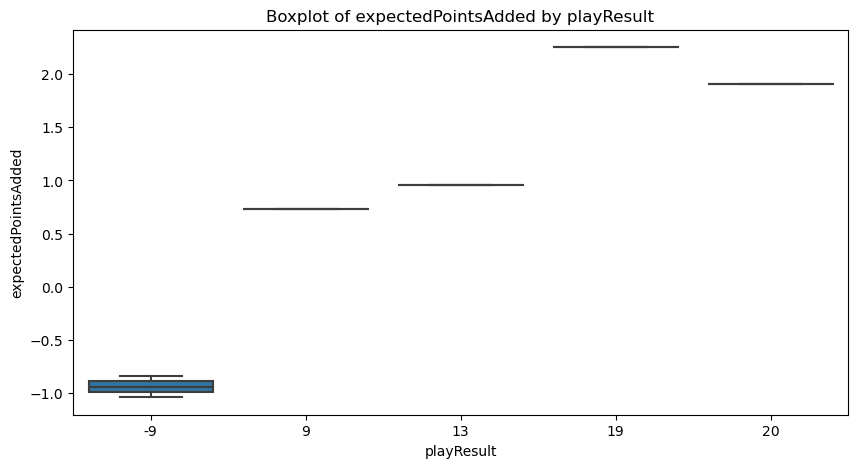

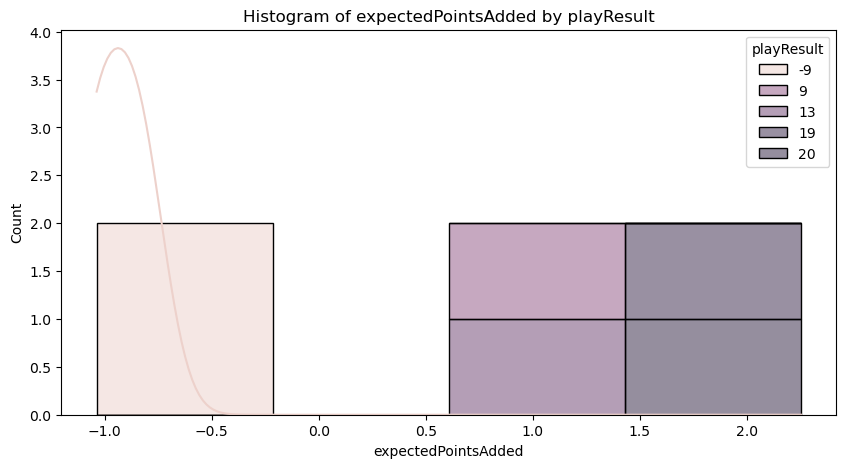

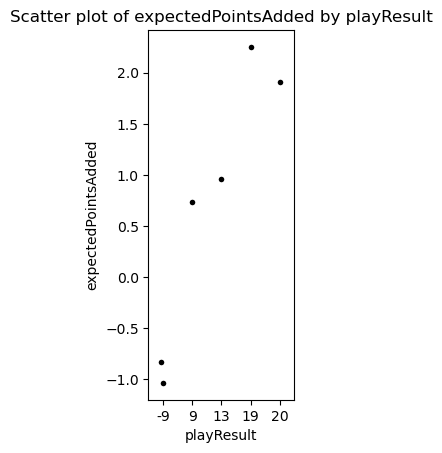

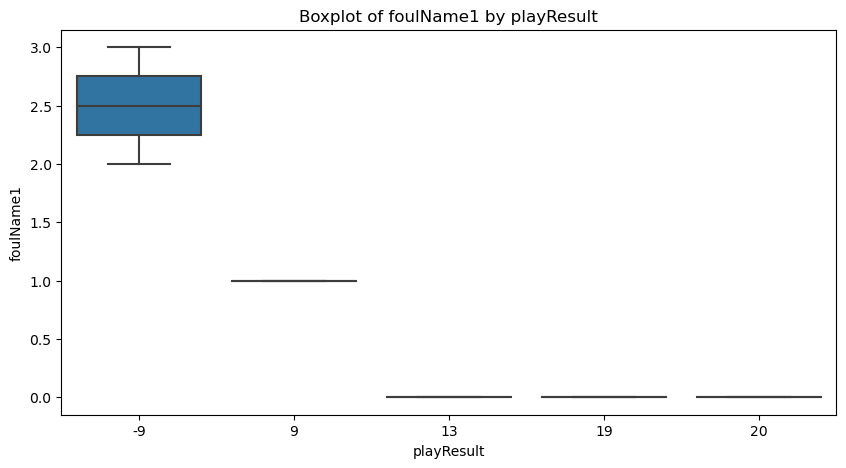

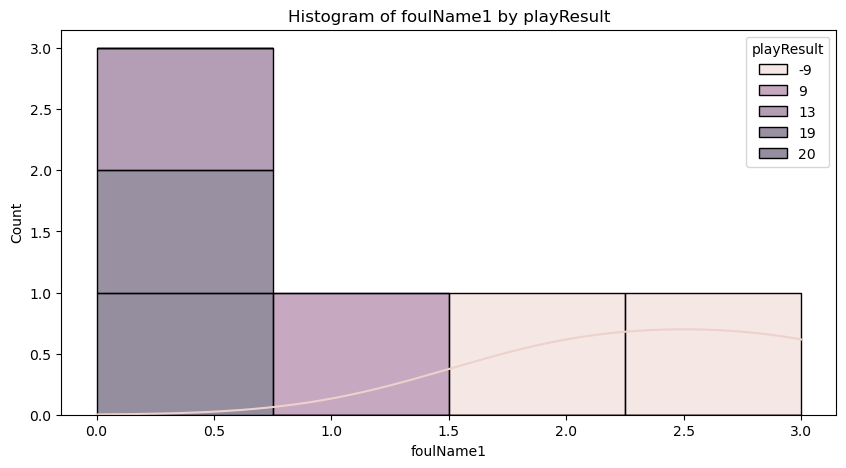

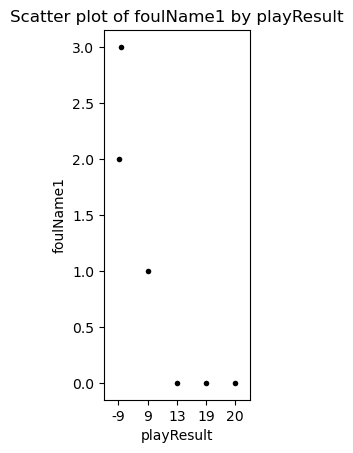

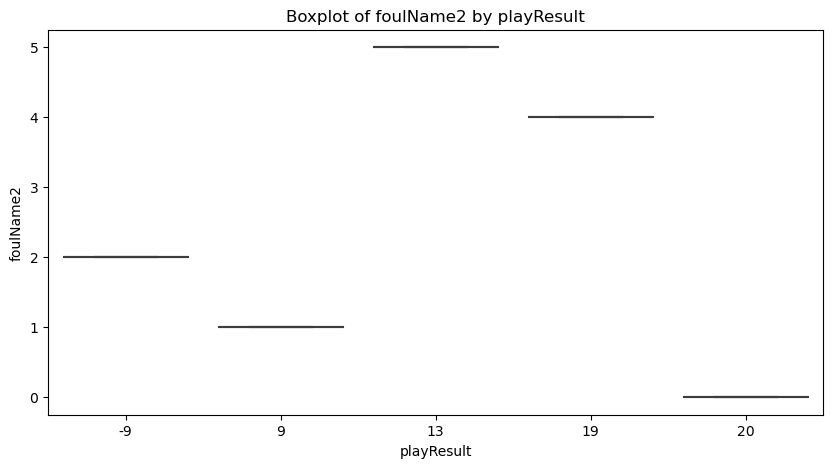

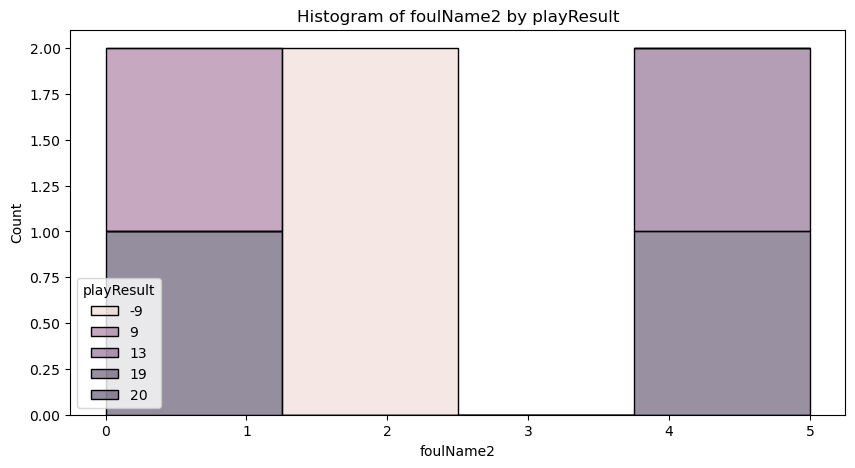

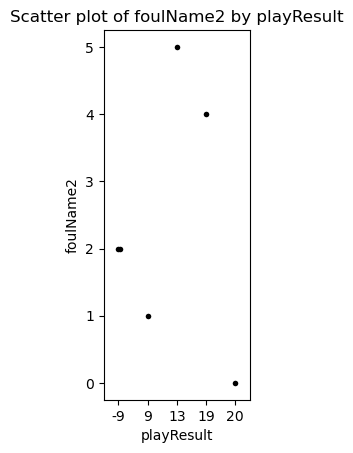

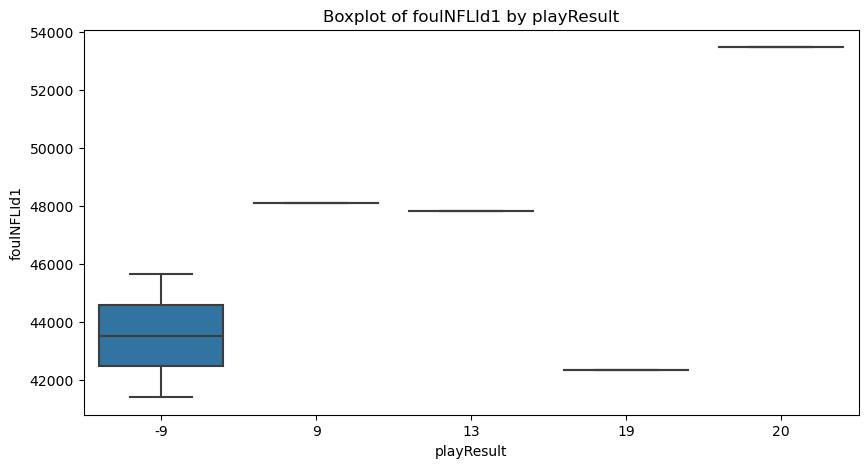

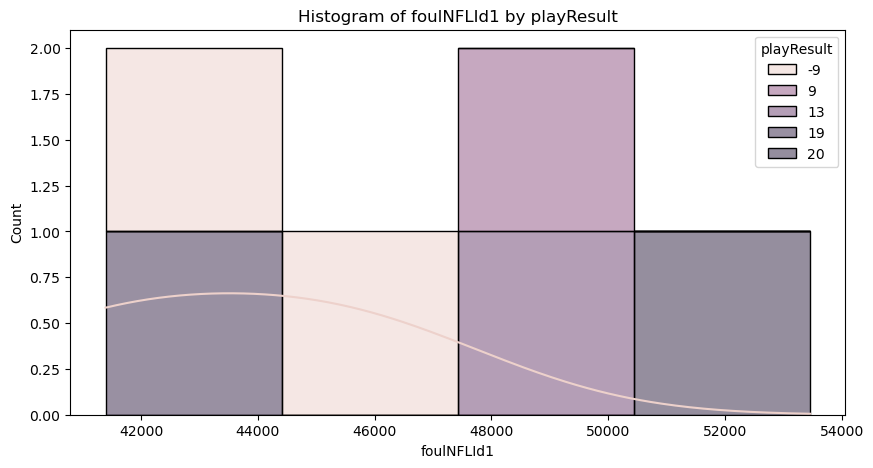

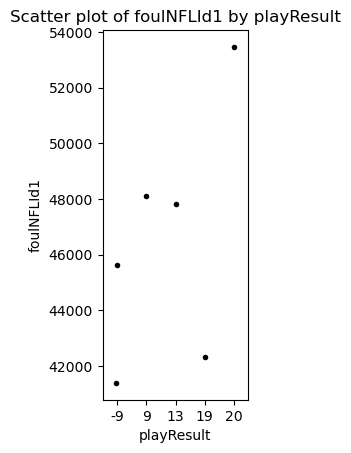

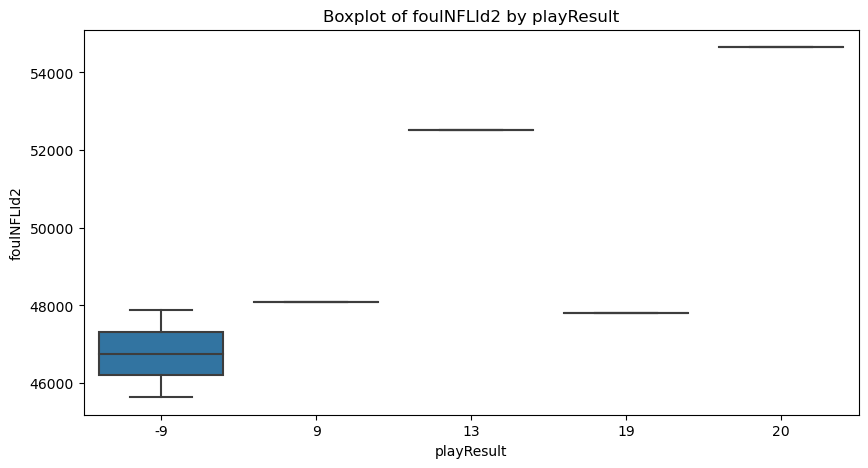

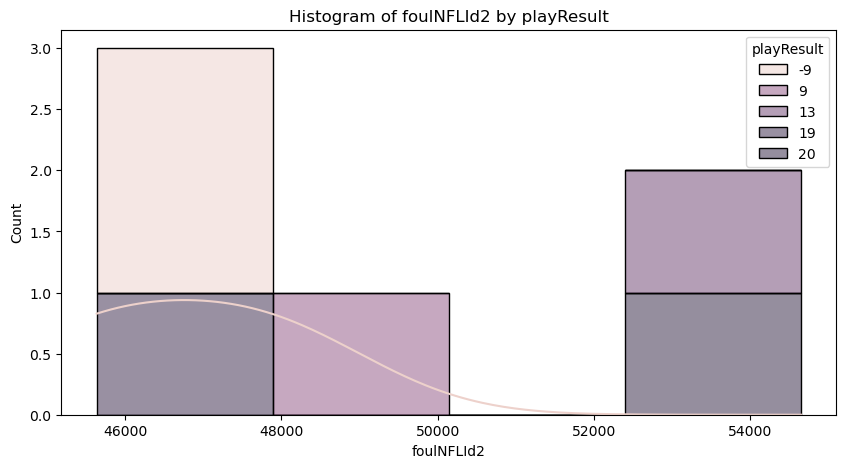

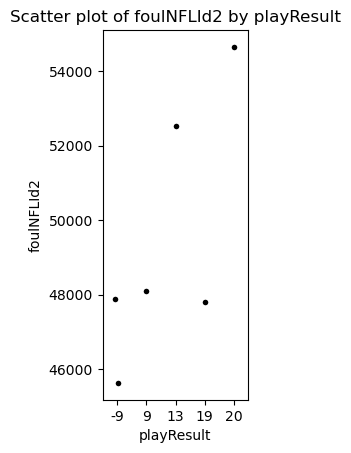

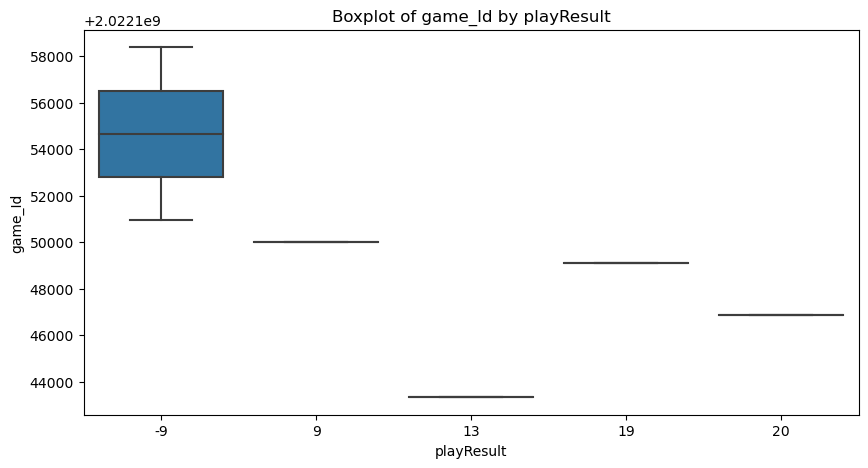

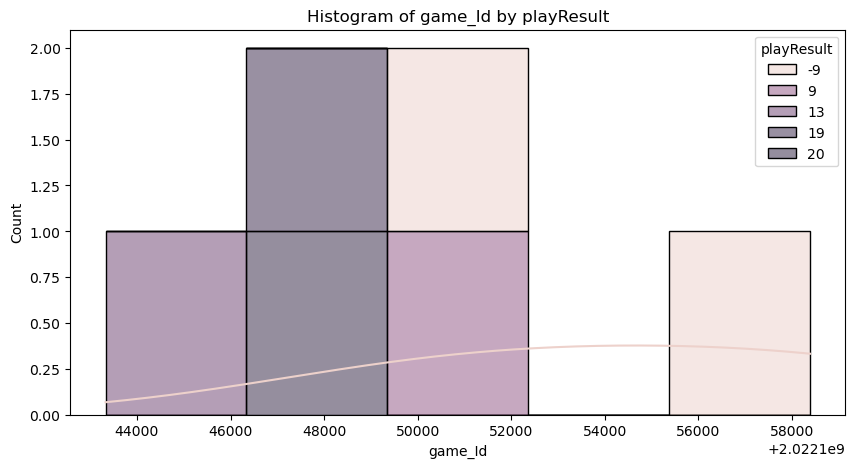

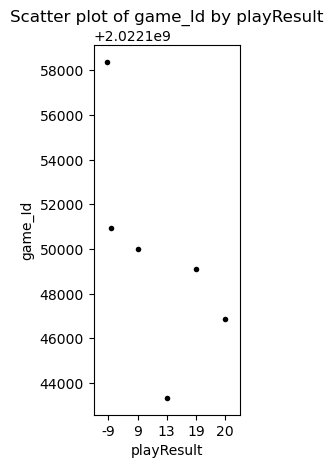

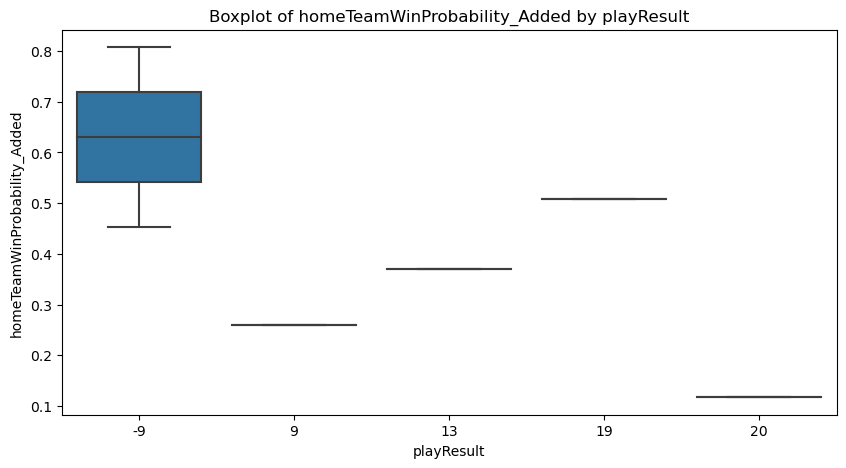

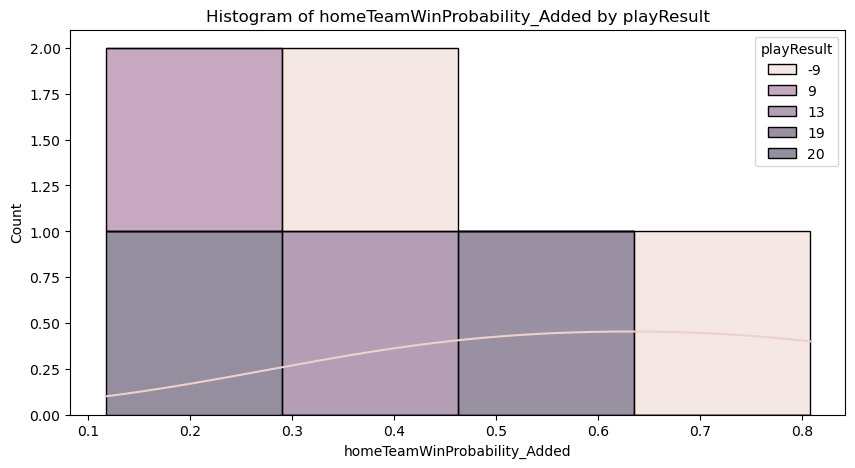

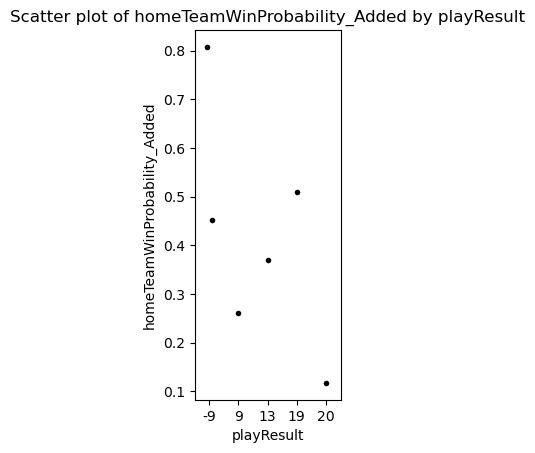

In [1449]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of the target variable
sns.countplot(x='playResult', data=train_df)
plt.title('Distribution of playResult')
plt.show()

# Boxplot for numerical variables
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='playResult', y=col, data=train_df)
    plt.title(f'Boxplot of {col} by playResult')
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train_df, x=col, hue='playResult', multiple='stack', kde=True)
    plt.title(f'Histogram of {col} by playResult')
    plt.show()
    
    # scatter
    plt.subplot(1, 3, 2)
    sns.stripplot(x='playResult', y=col, data=train_df, color='black', size=4, jitter=True)
    plt.title(f'Scatter plot of {col} by playResult')

# Distribution of categorical variables
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.show()

### Correlation Analysis

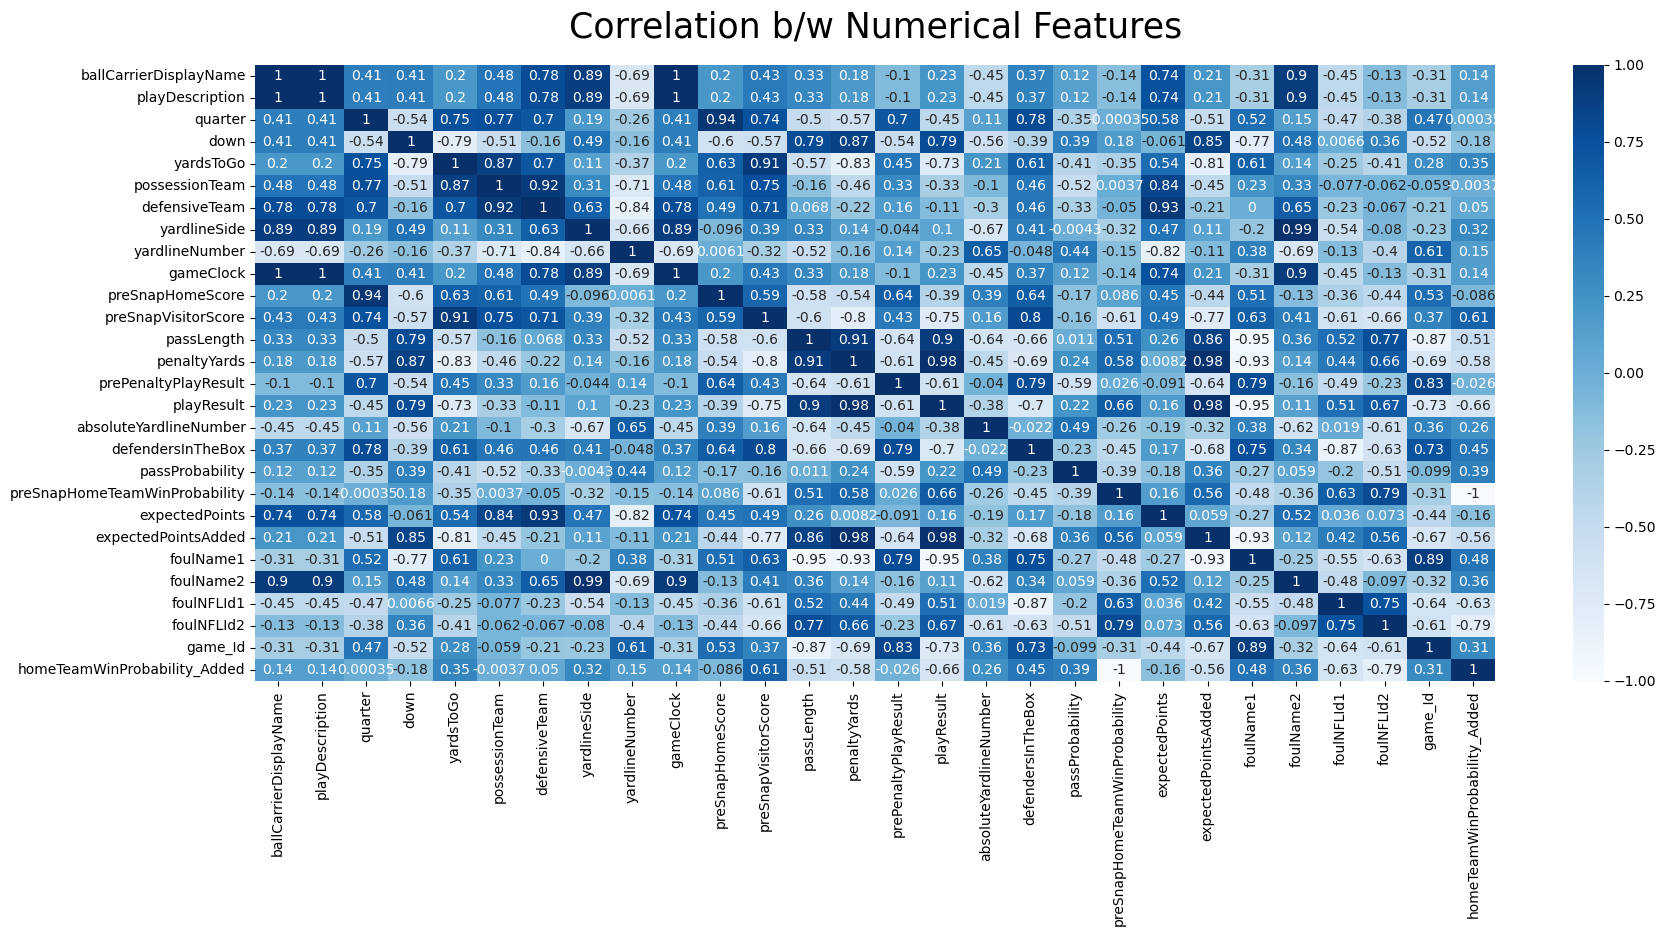

In [1450]:
table = train_df[num_cols].corr()
plt.figure(figsize=[20,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

In [1451]:
# Removing completely correlated columns

for data in [train_df,test_df ]:
    data.drop(columns=['ballCarrierDisplayName', 'playDescription', 'gameClock'], inplace=True)

df.head()

,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,...,passProbability,preSnapHomeTeamWinProbability,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_Id,homeTeamWinProbability_Added
2539,0.0,0.0,1,2,8,0.0,0.0,0.0,41,0.0,...,0.677767,0.882784,1.524985,1.911744,0.0,0.0,53459.0,54650.0,2022146846,0.117216
2973,1.0,1.0,4,3,6,1.0,1.0,1.0,44,1.0,...,0.980336,0.517184,0.868154,3.926174,1.0,1.0,46081.0,46081.0,2022159635,0.482816
4270,2.0,2.0,2,1,10,2.0,2.0,2.0,41,2.0,...,0.831070,0.192431,2.039064,-0.837322,2.0,2.0,45635.0,45635.0,2022150935,0.807569
6351,3.0,3.0,4,1,10,3.0,3.0,3.0,40,3.0,...,0.574198,0.547380,2.083483,-1.037525,3.0,2.0,41390.0,47874.0,2022158384,0.452620
7269,4.0,4.0,4,1,10,4.0,4.0,1.0,38,4.0,...,0.784698,0.739908,3.722697,0.730398,1.0,1.0,48089.0,48089.0,2022150019,0.260092


In [1452]:
# there is a strong linear correlation between variables

# Imbalanced Target Variable

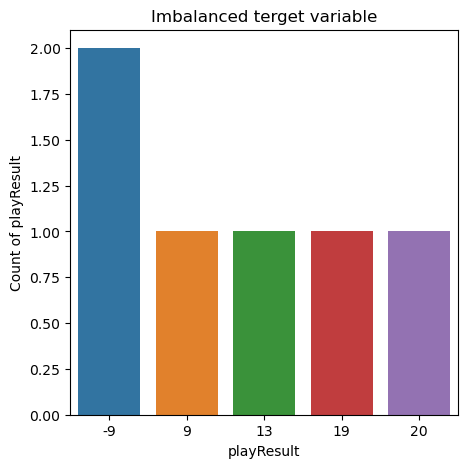

In [1453]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.countplot(x='playResult', data=train_df)
plt.title('Imbalanced terget variable')
plt.xlabel('playResult')
plt.ylabel('Count of playResult')
plt.show()


## Correlation of Features with Target Variable

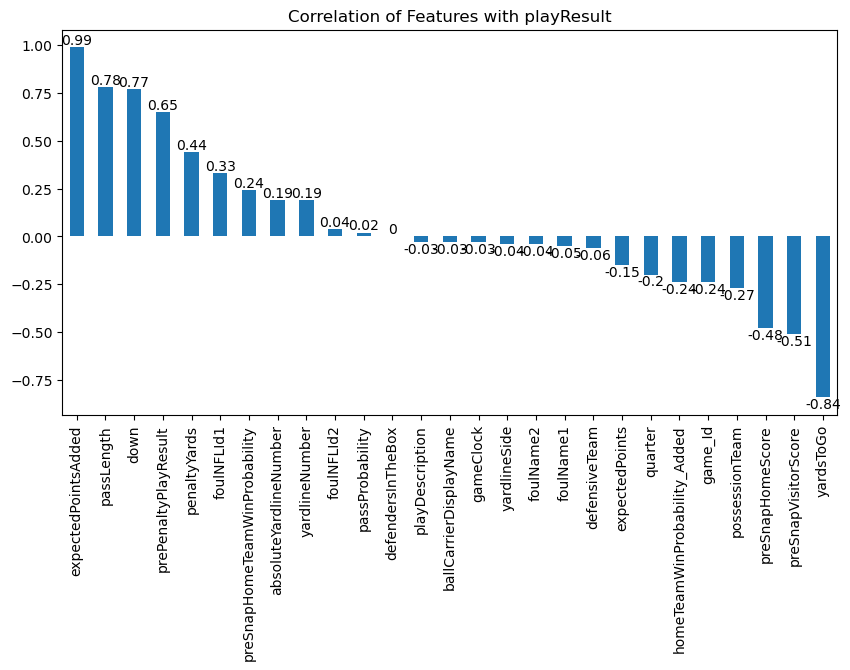

In [1454]:
p = round(df.corr()['playResult'].sort_values(ascending=False)[1:],2).plot(kind='bar', figsize=(10,5))
p.bar_label(p.containers[0])
plt.title('Correlation of Features with playResult')
plt.show()

# Modelling

In [1455]:
# scaling of our train dataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

num_cols = train_df.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(train_df[num_cols])
train_scaled = pd.DataFrame(scaled_cols, columns=num_cols)

train_scaled.head()


,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,passProbability,preSnapHomeTeamWinProbability,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_Id,homeTeamWinProbability_Added
0,-1.507557,0.447214,-1.414214,-1.237437,-1.520526,-1.339788,0.606450,-1.222222,-1.973855,0.953463,...,-0.439433,1.401272,-1.149313,1.001815,-0.866025,-1.372813,1.744208,1.678716,-0.637847,-1.401272
1,0.301511,0.447214,0.707107,1.414214,1.699412,1.497410,-2.205271,-0.333333,0.592157,1.239501,...,-1.034756,0.230150,1.613984,0.236842,-0.866025,1.568929,0.335817,0.993189,-1.405401,-0.230150
2,-0.603023,-0.894427,0.707107,-0.176777,-0.447214,-0.394055,0.606450,-0.555556,0.789542,-1.048809,...,0.725602,-1.800422,-0.622325,-1.203757,0.866025,-0.196116,-0.203000,-1.219983,0.254034,1.800422
3,1.206045,-0.894427,0.707107,0.883883,0.626099,-0.866921,0.110264,1.666667,0.394771,-0.476731,...,0.373191,0.738648,1.103584,0.054022,0.000000,-0.784465,0.407742,-0.430919,0.054238,-0.738648
4,1.206045,-0.894427,0.707107,0.353553,0.089443,0.078811,0.441054,1.000000,0.789542,-1.334848,...,-1.226506,-0.154252,-0.576790,-1.364379,1.732051,-0.196116,-1.259480,-0.500051,1.878788,0.154252


##  Model Evaluation with Cross Validation

In [1457]:
import pandas as pd
#  train_scaled is your DataFrame and cat_cols is a list of categorical column names
x = train_scaled.copy()
# Convert only the non-NaN values to integers
# Now you can use x for further processing
y = pd.Series(df['playResult'])

In [1458]:
# reshaping by reducing the size on samples in x
min_samples = min(x_reduced.shape[0], y.shape[0])
x_reduced = x.iloc[:min_samples, :]
y = y.iloc[:min_samples]

In [1459]:
# checking for the shape of my x and y variables
print(x_reduced.shape)
print(y.shape)


(6, 25)
(6,)


In [1460]:

# Now, check the shapes of x_reduced and y after ensuring consistency
print('Shape of x (consistent):', x_reduced.shape)
print('Shape of y (consistent):', y.shape)

Shape of x (consistent): (6, 25)
Shape of y (consistent): (6,)


In [1461]:
 # Perform the train-test split
train_x, test_x, train_y, test_y = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

In [1462]:
# model cross vailidation 
#import important packages for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [1463]:
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(n_estimators=100),
    
    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),
    
    #Nearest Neighbour
    KNeighborsClassifier(),
    
    #XGBoost
    XGBClassifier(),
    
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
       
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']


In [1464]:
print(y.value_counts())

-9     2
 20    1
 45    1
 9     1
 39    1
Name: playResult, dtype: int64


In [1465]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

scoring = {'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro', 'accuracy': 'accuracy'}
cv_results = cross_validate(model, x_reduced, y, cv=StratifiedKFold(n_splits=2), scoring=scoring, return_train_score=True)

In [1466]:
from sklearn.model_selection import cross_validate, StratifiedKFold

model_name = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []

model_name.append(model.__class__.__name__)

# appendng metric columns 
test_accuracy_value = round(cv_results['test_accuracy'].mean(), 3) * 100
test_accuracy.append(test_accuracy_value)

test_precision_value = round(cv_results['test_precision'].mean(), 3) * 100
test_precision.append(test_precision_value)

test_recall_value = round(cv_results['test_recall'].mean(), 3) * 100
test_recall.append(test_recall_value)

test_f1_value = round(cv_results['test_f1'].mean(), 3) * 100
test_f1.append(test_f1_value)

In [1467]:
import pandas as pd
# Create DataFrame for model metrics

metrics_data = [model_name, test_accuracy_value, test_precision_value, test_recall_value, test_f1_value]
metrics_cols = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
m = {n: m for n, m in zip(metrics_cols, metrics_data)}

model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')

In [1468]:
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,AdaBoostClassifier,16.700000,6.200000,12.500000,8.300000


In [1469]:
final_model= AdaBoostClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)
final_model.score(x_test, y_test)

0.0

# Visualisation of Feature Weights

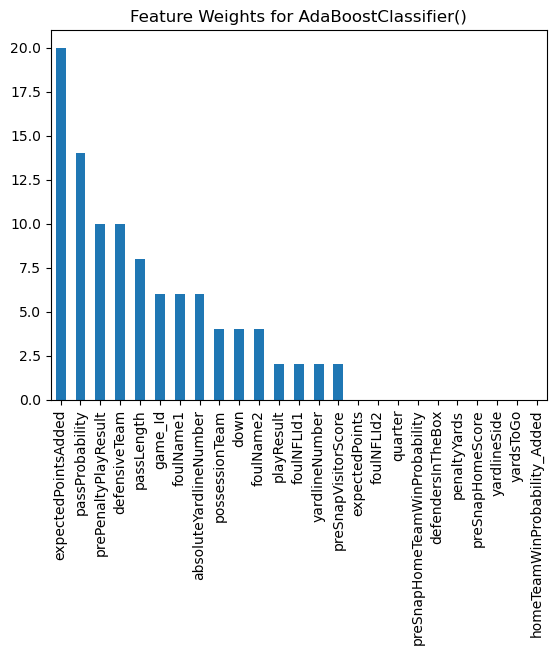

In [1470]:
feature_weights = pd.Series((np.round(final_model.feature_importances_,3))*100, 
                            index=x_train.columns.values).sort_values(ascending=False)

feature_weights.plot(kind='bar')
plt.title('Feature Weights for AdaBoostClassifier()')
plt.show()

# scaling of test dataset

In [1471]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

num_cols = test_df.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(test_df[num_cols])
test_scaled = pd.DataFrame(scaled_cols, columns=num_cols)
test_scaled.head()

,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,passProbability,preSnapHomeTeamWinProbability,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,game_Id,homeTeamWinProbability_Added
0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0


# Submission

In [1472]:
predictions = final_model.predict(test_scaled)
submit = pd.DataFrame({'id': test_scaled.index, 'playResult': predictions})
submit.head()

,id,playResult
0,0,19
1,1,9
